In [31]:
from pathlib import Path

import pandas as pd

from am_notebooks import nb_show_table, RESULT_DIR, FOCUS_DICT, BASIC_FOCUS, NEG_WORDS
from source.utils.associate import AM_DF_DIR, adjust_am_names
from math import sqrt
pd.set_option("display.float_format", '{:,.2f}'.format)
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

FLOORS = {'ALL': 500,
          'NEQ': 200}

BLIND_AM_PATHS = {tag: AM_DF_DIR.joinpath(
    f'adv_adj/ANYdirect/extra/AdvAdj_{tag}_any-direct_final-freq_min{FLOORS[tag]}x_extra.parq')
    for tag in ['ALL', 'NEQ']}

## Context-Blind `adv~adj` AMs for superset (ALL perspective)


In [32]:
all_blind = adjust_am_names(pd.read_parquet(BLIND_AM_PATHS['ALL'], engine='pyarrow', 
                            columns=FOCUS_DICT['ALL']['adv_adj+sqrt']))


In [33]:
def get_metric_top(amdf:pd.DataFrame, 
                   metric:str, 
                   k:int=8, 
                   to_front:bool=True, 
                            tie_breaker:str='f') -> pd.DataFrame:
    
    top_rows = amdf.nlargest(k, [metric, tie_breaker])
    if to_front: 
        top_rows = top_rows[pd.Series([metric]+amdf.columns.to_list()).drop_duplicates()]
    return top_rows
get_metric_top(all_blind, 'LRC')

,LRC,f,dP1,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
nerve~wracking,20.63,527,0.98,0.98,"13,362.53",nerve,wracking,531,538,71961373,0.00,527.00,1.00,0.99,0.99,0.99,22.96,23.04,23.19
bone~marrow,19.77,993,0.98,0.98,"22,804.82",bone,marrow,1222,1017,71961373,0.02,992.98,1.00,0.81,0.81,0.89,31.51,34.96,31.89
above~reproach,17.48,575,0.96,0.96,"11,355.17",above,reproach,3402,599,71961373,0.03,574.97,1.00,0.17,0.17,0.56,23.98,58.33,24.47
thinly~veiled,16.71,1333,0.78,0.78,"28,016.71",thinly,veiled,1746,1705,71961373,0.04,"1,332.96",1.00,0.76,0.76,0.77,36.51,41.79,41.29
scantily~clad,14.96,4638,0.71,0.71,"90,347.15",scantily,clad,4682,6562,71961373,0.43,"4,637.57",1.00,0.99,0.99,0.85,68.10,68.43,81.01
finely~chopped,14.58,1099,0.71,0.71,"19,318.61",finely,chopped,5229,1553,71961373,0.11,"1,098.89",1.00,0.21,0.21,0.46,33.15,72.31,39.41
sparsely~populated,14.27,900,0.35,0.35,"16,678.71",sparsely,populated,1559,2558,71961373,0.06,899.94,1.00,0.58,0.58,0.46,30.00,39.48,50.58
tightly~knit,14.15,977,0.54,0.54,"17,157.17",tightly,knit,3614,1797,71961373,0.09,976.91,1.00,0.27,0.27,0.41,31.26,60.12,42.39


In [34]:
nb_show_table(all_blind.sample(5))


|                        |   `f` |   `dP1` |   `LRC` |   `P1` |        `G2` | `l1`          | `l2`        |      `f1` |      `f2` |        `N` |    `exp_f` |   `unexp_f` |   `unexp_r` |   `dP2` |   `P2` |   `deltaP_mean` |   `f_sqrt` |   `f1_sqrt` |   `f2_sqrt` |
|:-----------------------|------:|--------:|--------:|-------:|------------:|:--------------|:------------|----------:|----------:|-----------:|-----------:|------------:|------------:|--------:|-------:|----------------:|-----------:|------------:|------------:|
| **patently~absurd**    |   973 |    0.04 |    8.11 |   0.04 |    9,425.48 | patently      | absurd      |     9,805 |    22,337 | 71,961,373 |       3.04 |      969.96 |        1.00 |    0.10 |   0.10 |            0.07 |      31.19 |       99.02 |      149.46 |
| **most~good**          | 4,707 |   -0.10 |   -5.16 |   0.00 | -308,231.79 | most          | good        | 7,120,428 | 1,670,122 | 71,961,373 | 165,255.09 | -160,548.09 |      -34.11 |   -0.03 |   0.00 |   

In [35]:
get_metric_top(all_blind, 'deltaP_mean')


,deltaP_mean,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
nerve~wracking,0.99,527,0.98,20.63,0.98,"13,362.53",nerve,wracking,531,538,71961373,0.00,527.00,1.00,0.99,0.99,22.96,23.04,23.19
bone~marrow,0.89,993,0.98,19.77,0.98,"22,804.82",bone,marrow,1222,1017,71961373,0.02,992.98,1.00,0.81,0.81,31.51,34.96,31.89
scantily~clad,0.85,4638,0.71,14.96,0.71,"90,347.15",scantily,clad,4682,6562,71961373,0.43,"4,637.57",1.00,0.99,0.99,68.10,68.43,81.01
thinly~veiled,0.77,1333,0.78,16.71,0.78,"28,016.71",thinly,veiled,1746,1705,71961373,0.04,"1,332.96",1.00,0.76,0.76,36.51,41.79,41.29
partly~cloudy,0.76,54239,0.84,12.15,0.84,"734,391.31",partly,cloudy,78766,64456,71961373,70.55,"54,168.45",1.00,0.69,0.69,232.89,280.65,253.88
minimally~invasive,0.68,16115,0.55,12.03,0.55,"244,122.64",minimally,invasive,19690,29293,71961373,8.02,"16,106.98",1.00,0.82,0.82,126.94,140.32,171.15
openly~gay,0.59,19704,0.62,11.60,0.62,"271,413.97",openly,gay,35791,31678,71961373,15.76,"19,688.24",1.00,0.55,0.55,140.37,189.19,177.98
above~reproach,0.56,575,0.96,17.48,0.96,"11,355.17",above,reproach,3402,599,71961373,0.03,574.97,1.00,0.17,0.17,23.98,58.33,24.47


In [36]:
get_metric_top(all_blind, 'G2')

,G2,f,dP1,LRC,P1,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
so~many,"3,329,624.25",1049935,0.51,4.10,0.57,so,many,5173538,1835842,71961373,"131,984.67","917,950.33",0.87,0.19,0.20,0.35,"1,024.66","2,274.54","1,354.93"
much~more,"1,292,287.90",309604,0.36,4.59,0.38,much,more,1760618,815328,71961373,"19,947.94","289,656.06",0.94,0.17,0.18,0.26,556.42,"1,326.88",902.96
too~much,"1,250,614.19",441932,0.29,3.50,0.33,too,much,2976740,1336122,71961373,"55,269.76","386,662.24",0.87,0.14,0.15,0.22,664.78,"1,725.32","1,155.91"
so~much,"1,132,043.76",524372,0.33,3.05,0.39,so,much,5173538,1336122,71961373,"96,058.17","428,313.83",0.82,0.09,0.10,0.21,724.14,"2,274.54","1,155.91"
much~better,"1,122,880.19",254524,0.40,4.85,0.42,much,better,1760618,600470,71961373,"14,691.19","239,832.81",0.94,0.14,0.14,0.27,504.50,"1,326.88",774.90
most~recent,"989,997.89",292381,0.69,5.01,0.78,most,recent,7120428,373138,71961373,"36,921.23","255,459.77",0.87,0.04,0.04,0.36,540.72,"2,668.41",610.85
most~important,"926,676.76",690094,0.25,2.25,0.34,most,important,7120428,2001942,71961373,"198,087.99","492,006.01",0.71,0.08,0.10,0.16,830.72,"2,668.41","1,414.90"
more~likely,"812,777.15",451270,0.39,2.91,0.51,more,likely,8659678,884149,71961373,"106,396.60","344,873.40",0.76,0.05,0.05,0.22,671.77,"2,942.73",940.29


In [37]:
get_metric_top(all_blind, 'dP1')


,dP1,f,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
super~duper,0.99,626,12.77,1.00,"6,886.23",super,duper,290876,627,71961373,2.53,623.47,1.00,0.00,0.00,0.50,25.02,539.33,25.04
far~away,0.99,1150,12.48,0.99,"11,844.59",far,away,402768,1157,71961373,6.48,"1,143.52",0.99,0.00,0.00,0.50,33.91,634.64,34.01
nerve~wracking,0.98,527,20.63,0.98,"13,362.53",nerve,wracking,531,538,71961373,0.00,527.00,1.00,0.99,0.99,0.99,22.96,23.04,23.19
bone~marrow,0.98,993,19.77,0.98,"22,804.82",bone,marrow,1222,1017,71961373,0.02,992.98,1.00,0.81,0.81,0.89,31.51,34.96,31.89
above~reproach,0.96,575,17.48,0.96,"11,355.17",above,reproach,3402,599,71961373,0.03,574.97,1.00,0.17,0.17,0.56,23.98,58.33,24.47
just~sayin,0.93,724,9.78,0.94,"6,595.34",just,sayin,597938,769,71961373,6.39,717.61,0.99,0.00,0.00,0.47,26.91,773.26,27.73
well~intentioned,0.89,1407,11.15,0.89,"15,973.16",well,intentioned,168552,1578,71961373,3.70,"1,403.30",1.00,0.01,0.01,0.45,37.51,410.55,39.72
most~wanted,0.89,2810,8.27,0.99,"12,622.27",most,wanted,7120428,2846,71961373,281.61,"2,528.39",0.90,0.00,0.00,0.44,53.01,"2,668.41",53.35


In [38]:
get_metric_top(all_blind, 'dP2')


,dP2,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
chock~full,1.00,1209,0.01,9.41,0.01,"16,142.21",chock,full,1210,90742,71961373,1.53,"1,207.47",1.00,1.00,0.51,34.77,34.79,301.23
nerve~wracking,0.99,527,0.98,20.63,0.98,"13,362.53",nerve,wracking,531,538,71961373,0.00,527.00,1.00,0.99,0.99,22.96,23.04,23.19
scantily~clad,0.99,4638,0.71,14.96,0.71,"90,347.15",scantily,clad,4682,6562,71961373,0.43,"4,637.57",1.00,0.99,0.85,68.10,68.43,81.01
crystal~clear,0.98,6881,0.02,7.60,0.02,"72,297.63",crystal,clear,7009,346404,71961373,33.74,"6,847.26",1.00,0.98,0.50,82.95,83.72,588.56
proof~positive,0.97,1395,0.01,8.49,0.01,"16,534.08",proof,positive,1440,167067,71961373,3.34,"1,391.66",1.00,0.97,0.49,37.35,37.95,408.74
hiv~positive,0.95,927,0.01,8.41,0.01,"10,880.22",hiv,positive,973,167067,71961373,2.26,924.74,1.00,0.95,0.48,30.45,31.19,408.74
brand~new,0.95,12775,0.05,8.09,0.05,"140,058.18",brand,new,13399,252270,71961373,46.97,"12,728.03",1.00,0.95,0.50,113.03,115.75,502.26
upwardly~mobile,0.95,1893,0.09,11.67,0.09,"30,316.40",upwardly,mobile,2002,20114,71961373,0.56,"1,892.44",1.00,0.95,0.52,43.51,44.74,141.82


In [39]:
nb_show_table(get_metric_top(all_blind, 'P1'), n_dec=3)


|                    |   `P1` |    `f` |   `dP1` |   `LRC` |        `G2` | `l1`   | `l2`     |      `f1` |   `f2` |        `N` |    `exp_f` |   `unexp_f` |   `unexp_r` |   `dP2` |   `P2` |   `deltaP_mean` |   `f_sqrt` |   `f1_sqrt` |   `f2_sqrt` |
|:-------------------|-------:|-------:|--------:|--------:|------------:|:-------|:---------|----------:|-------:|-----------:|-----------:|------------:|------------:|--------:|-------:|----------------:|-----------:|------------:|------------:|
| **super~duper**    |  0.998 |    626 |   0.994 |  12.770 |   6,886.227 | super  | duper    |   290,876 |    627 | 71,961,373 |      2.534 |     623.466 |       0.996 |   0.002 |  0.002 |           0.498 |     25.020 |     539.329 |      25.040 |
| **far~away**       |  0.994 |  1,150 |   0.988 |  12.485 |  11,844.587 | far    | away     |   402,768 |  1,157 | 71,961,373 |      6.476 |   1,143.524 |       0.994 |   0.003 |  0.003 |           0.496 |     33.912 |     634.640 |      34.015 |
| **ver

In [40]:
nb_show_table(get_metric_top(all_blind, 'P2'), n_dec=3)


|                     |   `P2` |    `f` |   `dP1` |   `LRC` |   `P1` |        `G2` | `l1`     | `l2`     |   `f1` |    `f2` |        `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |   `dP2` |   `deltaP_mean` |   `f_sqrt` |   `f1_sqrt` |   `f2_sqrt` |
|:--------------------|-------:|-------:|--------:|--------:|-------:|------------:|:---------|:---------|-------:|--------:|-----------:|----------:|------------:|------------:|--------:|----------------:|-----------:|------------:|------------:|
| **chock~full**      |  0.999 |  1,209 |   0.013 |   9.407 |  0.013 |  16,142.207 | chock    | full     |  1,210 |  90,742 | 71,961,373 |     1.526 |   1,207.474 |       0.999 |   0.998 |           0.506 |     34.771 |      34.785 |     301.234 |
| **nerve~wracking**  |  0.992 |    527 |   0.980 |  20.631 |  0.980 |  13,362.525 | nerve    | wracking |    531 |     538 | 71,961,373 |     0.004 |     526.996 |       1.000 |   0.992 |           0.986 |     22.956 |      23.043 |      23.195 |
| **sca

In [41]:
def show_combined_top(amdf: pd.DataFrame,
                      k: int = 5,
                      metric_cols: tuple = ('f', 'LRC', 'deltaP_mean', 'dP1', 'P1',
                                            'dP2', 'P2', 'G2', 'unexp_f', 'unexp_r'),
                      tie_breaker: str = 'LRC',
                      polar: bool = False
                      ) -> pd.DataFrame:
    sort_list = ['f', 'LRC', 'f2']

    _amdf = amdf.copy().filter(metric_cols + ('f', 'f1', 'f2', tie_breaker, 'l1', 'l2', 'f_sqrt'))
    if 'unexp_r' in metric_cols:
        _amdf = _amdf.rename(columns={'unexp_r': 'unexp_%'})
        _amdf['unexp_%'] = _amdf['unexp_%'] * 100
        metric_cols = tuple((m if m != 'unexp_r' else 'unexp_%')
                            for m in metric_cols)
    combined_top = pd.concat(
        [get_metric_top(_amdf, m, k=k, to_front=False, tie_breaker=tie_breaker)
         .assign(top_for=m)
         .reset_index().set_index(['key', 'top_for'])
         for m in metric_cols]
    ).sort_values(_amdf.filter(items=sort_list).columns.to_list(), ascending=False)
    combined_top = combined_top.reset_index()
    combined_top['key'] = combined_top.key.astype(
        'string').str.replace('~', ' ')
    _top = combined_top.assign(
        top_for=combined_top.key.apply(
            lambda key: '`'
            + '`; `'.join(combined_top.loc[combined_top.key == key, 'top_for'])
            + '`')
        .astype('string')
    ).drop_duplicates('key')
    for m_2d in ['exp_f', 'unexp_f']:
        if m_2d in _top.columns:
            _top[m_2d] = _top[m_2d].round(2)
    # if 'G2' in _top.columns:
    #     _top['G2'] = _top['G2'].round(1)
    for m_int in ['adv_total', 'adj_total', 'G2']:
        if m_int in _top.columns:
            _top[m_int] = _top[m_int].astype('int')
        
    view_cols = ['key', 'top_for', 'f'] + list(metric_cols) + [tie_breaker]
    top_view = _top.filter(
        view_cols + ['l1'] if polar else view_cols).reset_index(drop=True)
    if polar:
        for pole, polar_am in top_view.groupby('l1', observed=True):
            nb_show_table(
                polar_am,
                title=f'**{pole.capitalize()}**: Top {k} Values of Assorted AMs, by descending raw joint frequency',
                n_dec=3, show_index=False
            )
    else:
        nb_show_table(
            top_view,
            title=f'Top {k} Values of Assorted AMs, by descending raw joint frequency',
            n_dec=3, show_index=False)
    return _top


# show_combined_top(all_blind, tie_breaker='LRC')
show_combined_top(all_blind, metric_cols=(
    'f', 'unexp_f', 'unexp_r'), tie_breaker='LRC')


Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                | `top_for`        |       `f` |   `unexp_f` |   `unexp_%` |   `LRC` |
|:---------------------|:-----------------|----------:|------------:|------------:|--------:|
| *so many*            | *`f`; `unexp_f`* | 1,049,935 | 917,950.330 |      87.429 |   4.096 |
| *most important*     | *`f`; `unexp_f`* |   690,094 | 492,006.010 |      71.296 |   2.248 |
| *so much*            | *`f`; `unexp_f`* |   524,372 | 428,313.830 |      81.681 |   3.045 |
| *more likely*        | *`f`; `unexp_f`* |   451,270 | 344,873.400 |      76.423 |   2.913 |
| *very good*          | *`f`*            |   447,797 | 233,813.520 |      52.214 |   1.304 |
| *too much*           | *`unexp_f`*      |   441,932 | 386,662.240 |      87.494 |   3.503 |
| *thinly veiled*      | *`unexp_%`*      |     1,333 |   1,332.960 |      99.997 |  16.706 |
| *bone marrow*        | *`unexp_%`*      |       993 |     992.980 |      99.998 |  19.

,key,top_for,f,unexp_f,unexp_%,f1,f2,LRC,l1,l2,f_sqrt
0,so many,`f`; `unexp_f`,1049935,"917,950.33",87.43,5173538,1835842,4.10,so,many,"1,024.66"
2,most important,`f`; `unexp_f`,690094,"492,006.01",71.30,7120428,2001942,2.25,most,important,830.72
4,so much,`f`; `unexp_f`,524372,"428,313.83",81.68,5173538,1336122,3.05,so,much,724.14
6,more likely,`f`; `unexp_f`,451270,"344,873.40",76.42,8659678,884149,2.91,more,likely,671.77
8,very good,`f`,447797,"233,813.52",52.21,9220012,1670122,1.30,very,good,669.18
9,too much,`unexp_f`,441932,"386,662.24",87.49,2976740,1336122,3.50,too,much,664.78
10,thinly veiled,`unexp_%`,1333,"1,332.96",100.00,1746,1705,16.71,thinly,veiled,36.51
11,bone marrow,`unexp_%`,993,992.98,100.00,1222,1017,19.77,bone,marrow,31.51
12,sparsely populated,`unexp_%`,900,899.94,99.99,1559,2558,14.27,sparsely,populated,30.00
13,above reproach,`unexp_%`,575,574.97,100.00,3402,599,17.48,above,reproach,23.98


In [42]:
show_combined_top(all_blind, metric_cols=('LRC', 'deltaP_mean', 'dP1', 'P1', 'dP2', 'P2', 'G2'), tie_breaker='f')


Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`            | `top_for`                                  |       `f` |   `LRC` |   `deltaP_mean` |   `dP1` |   `P1` |   `dP2` |   `P2` |      `G2` |
|:-----------------|:-------------------------------------------|----------:|--------:|----------------:|--------:|-------:|--------:|-------:|----------:|
| *so many*        | *`G2`*                                     | 1,049,935 |   4.096 |           0.352 |   0.513 |  0.572 |   0.191 |  0.203 | 3,329,624 |
| *so much*        | *`G2`*                                     |   524,372 |   3.045 |           0.208 |   0.327 |  0.392 |   0.089 |  0.101 | 1,132,043 |
| *too much*       | *`G2`*                                     |   441,932 |   3.503 |           0.215 |   0.295 |  0.331 |   0.135 |  0.148 | 1,250,614 |
| *much more*      | *`G2`*                                     |   309,604 |   4.591 |           0.264 |   0.359 |  0.380 |   0.169 |  0.176 | 1,292,287 

,key,top_for,LRC,deltaP_mean,dP1,P1,dP2,P2,G2,f,f1,f2,l1,l2,f_sqrt
0,so many,`G2`,4.10,0.35,0.51,0.57,0.19,0.20,3329624,1049935,5173538,1835842,so,many,"1,024.66"
1,so much,`G2`,3.05,0.21,0.33,0.39,0.09,0.10,1132043,524372,5173538,1336122,so,much,724.14
2,too much,`G2`,3.50,0.22,0.29,0.33,0.14,0.15,1250614,441932,2976740,1336122,too,much,664.78
3,much more,`G2`,4.59,0.26,0.36,0.38,0.17,0.18,1292287,309604,1760618,815328,much,more,556.42
4,much better,`G2`,4.85,0.27,0.40,0.42,0.14,0.14,1122880,254524,1760618,600470,much,better,504.50
5,very own,`P1`,8.36,0.43,0.86,0.98,0.01,0.01,339894,86224,9220012,87772,very,own,293.64
6,very least,`P1`,9.14,0.44,0.86,0.99,0.01,0.01,296978,74083,9220012,74810,very,least,272.18
7,partly cloudy,`deltaP_mean`,12.15,0.76,0.84,0.84,0.69,0.69,734391,54239,78766,64456,partly,cloudy,232.89
8,crystal clear,`dP2`; `P2`,7.60,0.50,0.02,0.02,0.98,0.98,72297,6881,7009,346404,crystal,clear,82.95
10,scantily clad,`LRC`; `deltaP_mean`; `dP2`; `P2`,14.96,0.85,0.71,0.71,0.99,0.99,90347,4638,4682,6562,scantily,clad,68.10


## Context-Blind `adv~adj` AMs for superset NEQ perspective

In [43]:
neq_blind = adjust_am_names(pd.read_parquet(BLIND_AM_PATHS['NEQ'], engine='pyarrow', 
                            columns=FOCUS_DICT['NEQ']['adv_adj+sqrt']))
neq_blind

,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
always~greener,468,0.71,6.36,0.73,"2,916.80",always,greener,127052,643,6347362,12.87,455.13,0.97,0.00,0.00,0.36,21.63,356.44,25.36
almost~daily,284,0.62,8.27,0.63,"2,661.51",almost,daily,20598,453,6347362,1.47,282.53,0.99,0.01,0.01,0.32,16.85,143.52,21.28
as~usual,805,0.55,3.55,0.65,"2,141.32",as,usual,656683,1240,6347362,128.29,676.71,0.84,0.00,0.00,0.27,28.37,810.36,35.21
any~happier,830,0.43,7.87,0.43,"7,348.55",any,happier,16176,1909,6347362,4.87,825.13,0.99,0.05,0.05,0.24,28.81,127.18,43.69
as~sharp,3026,0.42,3.03,0.52,"6,308.34",as,sharp,656683,5806,6347362,600.67,"2,425.33",0.80,0.00,0.00,0.21,55.01,810.36,76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yet~sure,1978,0.01,0.63,0.01,529.15,yet,sure,53779,134058,6347362,"1,135.83",842.17,0.43,0.02,0.04,0.01,44.47,231.90,366.14
yet~comfortable,275,0.00,0.00,0.01,21.61,yet,comfortable,53779,24239,6347362,205.37,69.63,0.25,0.00,0.01,0.00,16.58,231.90,155.69
yet~strong,327,0.00,0.00,0.01,0.23,yet,strong,53779,37594,6347362,318.52,8.48,0.03,0.00,0.01,0.00,18.08,231.90,193.89


In [44]:
from source.utils.dataframes import enhance_descrip

In [45]:
nb_show_table(enhance_descrip(neq_blind.select_dtypes(include='number')), title='NEQ context-blind (f>=200) stats')
nb_show_table(enhance_descrip(all_blind.select_dtypes(include='number')), title='ALL context-blind (f>=500) stats')

/home/arh234/anaconda3/envs/dev-sanpi/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:375: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)



NEQ context-blind (f>=200) stats

|                 |   `unique_forms` |       `mean` |      `std` |        `min` |        `25%` |     `median` |        `75%` |        `max` |           `total` |   `var_coeff` |    `range` |   `IQ_range` |   `Q_disper` |      `MAD` |   `upper_fence` |   `lower_fence` |
|:----------------|-----------------:|-------------:|-----------:|-------------:|-------------:|-------------:|-------------:|-------------:|------------------:|--------------:|-----------:|-------------:|-------------:|-----------:|----------------:|----------------:|
| **f**           |            3,836 |     1,087.50 |   2,819.60 |       200.00 |       274.00 |       420.00 |       829.00 |    51,552.00 |      4,171,677.00 |          2.60 |  51,352.00 |       555.00 |         0.50 |     182.00 |        1,661.50 |         -558.50 |
| **dP1**         |            3,836 |         0.10 |       0.10 |        -0.10 |         0.00 |         0.00 |         0.10 |         0.92 |            26

In [46]:
nb_show_table(neq_blind.sample(5).iloc[:, :-3])


|                       |   `f` |   `dP1` |   `LRC` |   `P1` |     `G2` | `l1`    | `l2`      |    `f1` |    `f2` |       `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |   `dP2` |   `P2` |   `deltaP_mean` |
|:----------------------|------:|--------:|--------:|-------:|---------:|:--------|:----------|--------:|--------:|----------:|----------:|------------:|------------:|--------:|-------:|----------------:|
| **equally~important** | 1,380 |    0.01 |    2.12 |   0.01 | 2,346.18 | equally | important |  12,627 | 138,658 | 6,347,362 |    275.84 |    1,104.16 |        0.80 |    0.09 |   0.11 |            0.05 |
| **that~low**          |   252 |   -0.01 |   -0.23 |   0.02 |   -69.59 | that    | low       | 166,680 |  15,473 | 6,347,362 |    406.32 |     -154.32 |       -0.61 |   -0.00 |   0.00 |           -0.01 |
| **more~careful**      |   959 |    0.06 |    0.61 |   0.15 |   268.33 | more    | careful   | 553,482 |   6,377 | 6,347,362 |    556.07 |      402.93 |        0.42 |    0.00 |  

In [47]:
get_metric_top(neq_blind, 'LRC')

,LRC,f,dP1,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
scantily~clad,14.99,244,0.70,0.70,"4,983.75",scantily,clad,248,348,6347362,0.01,243.99,1.00,0.98,0.98,0.84,15.62,15.75,18.65
legally~binding,12.99,664,0.92,0.92,"9,313.25",legally,binding,4552,722,6347362,0.52,663.48,1.00,0.15,0.15,0.53,25.77,67.47,26.87
partly~cloudy,12.60,2509,0.82,0.82,"36,821.70",partly,cloudy,3710,3048,6347362,1.78,"2,507.22",1.00,0.68,0.68,0.75,50.09,60.91,55.21
minimally~invasive,12.02,753,0.45,0.45,"11,841.40",minimally,invasive,948,1683,6347362,0.25,752.75,1.00,0.79,0.79,0.62,27.44,30.79,41.02
long~overdue,11.73,912,0.82,0.82,"11,929.33",long,overdue,5576,1117,6347362,0.98,911.02,1.00,0.16,0.16,0.49,30.20,74.67,33.42
previously~unreleased,11.66,251,0.87,0.87,"3,326.63",previously,unreleased,5497,289,6347362,0.25,250.75,1.00,0.05,0.05,0.46,15.84,74.14,17.00
mutually~exclusive,11.42,5727,0.79,0.79,"76,266.08",mutually,exclusive,7437,7253,6347362,8.50,"5,718.50",1.00,0.77,0.77,0.78,75.68,86.24,85.16
aesthetically~pleasing,10.94,980,0.36,0.36,"13,766.31",aesthetically,pleasing,1448,2739,6347362,0.62,979.38,1.00,0.68,0.68,0.52,31.30,38.05,52.34


In [48]:
get_metric_top(neq_blind, 'deltaP_mean')


,deltaP_mean,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
scantily~clad,0.84,244,0.70,14.99,0.70,"4,983.75",scantily,clad,248,348,6347362,0.01,243.99,1.00,0.98,0.98,15.62,15.75,18.65
mutually~exclusive,0.78,5727,0.79,11.42,0.79,"76,266.08",mutually,exclusive,7437,7253,6347362,8.50,"5,718.50",1.00,0.77,0.77,75.68,86.24,85.16
partly~cloudy,0.75,2509,0.82,12.60,0.82,"36,821.70",partly,cloudy,3710,3048,6347362,1.78,"2,507.22",1.00,0.68,0.68,50.09,60.91,55.21
minimally~invasive,0.62,753,0.45,12.02,0.45,"11,841.40",minimally,invasive,948,1683,6347362,0.25,752.75,1.00,0.79,0.79,27.44,30.79,41.02
legally~binding,0.53,664,0.92,12.99,0.92,"9,313.25",legally,binding,4552,722,6347362,0.52,663.48,1.00,0.15,0.15,25.77,67.47,26.87
terminally~ill,0.52,973,0.15,9.73,0.15,"12,808.79",terminally,ill,1092,6466,6347362,1.11,971.89,1.00,0.89,0.89,31.19,33.05,80.41
aesthetically~pleasing,0.52,980,0.36,10.94,0.36,"13,766.31",aesthetically,pleasing,1448,2739,6347362,0.62,979.38,1.00,0.68,0.68,31.30,38.05,52.34
closely~related,0.51,1925,0.13,8.65,0.14,"22,266.17",closely,related,2160,14257,6347362,4.85,"1,920.15",1.00,0.89,0.89,43.87,46.48,119.40


In [49]:
get_metric_top(neq_blind, 'dP1')


,dP1,f,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,dP2,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
legally~binding,0.92,664,12.99,0.92,"9,313.25",legally,binding,4552,722,6347362,0.52,663.48,1.00,0.15,0.15,0.53,25.77,67.47,26.87
too~shabby,0.89,5397,7.90,0.96,"27,241.05",too,shabby,433149,5613,6347362,383.04,"5,013.96",0.93,0.01,0.01,0.45,73.46,658.14,74.92
very~least,0.89,3497,8.55,0.99,"15,992.91",very,least,606530,3539,6347362,338.17,"3,158.83",0.90,0.01,0.01,0.45,59.14,778.80,59.49
too~late,0.89,29868,7.95,0.95,"150,893.15",too,late,433149,31301,6347362,"2,136.00","27,732.00",0.93,0.07,0.07,0.48,172.82,658.14,176.92
very~own,0.88,4076,8.04,0.98,"18,353.33",very,own,606530,4161,6347362,397.61,"3,678.39",0.90,0.01,0.01,0.45,63.84,778.80,64.51
previously~unreleased,0.87,251,11.66,0.87,"3,326.63",previously,unreleased,5497,289,6347362,0.25,250.75,1.00,0.05,0.05,0.46,15.84,74.14,17.00
very~first,0.85,6431,6.97,0.95,"27,479.00",very,first,606530,6798,6347362,649.59,"5,781.41",0.90,0.01,0.01,0.43,80.19,778.80,82.45
most~populous,0.83,1238,6.42,0.88,"6,211.38",most,populous,346992,1401,6347362,76.59,"1,161.41",0.94,0.00,0.00,0.42,35.19,589.06,37.43


In [50]:
get_metric_top(neq_blind, 'dP2')

,dP2,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r,P2,deltaP_mean,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,
scantily~clad,0.98,244,0.70,14.99,0.70,"4,983.75",scantily,clad,248,348,6347362,0.01,243.99,1.00,0.98,0.84,15.62,15.75,18.65
crystal~clear,0.97,406,0.00,5.82,0.00,"3,435.45",crystal,clear,414,83958,6347362,5.48,400.52,0.99,0.98,0.49,20.15,20.35,289.76
wide~open,0.91,1343,0.08,8.41,0.08,"15,347.83",wide,open,1469,15884,6347362,3.68,"1,339.32",1.00,0.91,0.50,36.65,38.33,126.03
terminally~ill,0.89,973,0.15,9.73,0.15,"12,808.79",terminally,ill,1092,6466,6347362,1.11,971.89,1.00,0.89,0.52,31.19,33.05,80.41
closely~related,0.89,1925,0.13,8.65,0.14,"22,266.17",closely,related,2160,14257,6347362,4.85,"1,920.15",1.00,0.89,0.51,43.87,46.48,119.40
mobile~friendly,0.88,509,0.05,8.70,0.05,"6,083.75",mobile,friendly,575,11030,6347362,1.00,508.00,1.00,0.89,0.46,22.56,23.98,105.02
humanly~possible,0.88,646,0.02,7.25,0.02,"6,406.37",humanly,possible,729,30222,6347362,3.47,642.53,0.99,0.89,0.45,25.42,27.00,173.84
vitally~important,0.87,772,0.01,5.07,0.01,"5,317.39",vitally,important,866,138658,6347362,18.92,753.08,0.98,0.89,0.44,27.78,29.43,372.37


In [51]:
show_combined_top(neq_blind)


Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                    | `top_for`                                      |    `f` |   `LRC` |   `deltaP_mean` |   `dP1` |   `P1` |   `dP2` |   `P2` |    `G2` |   `unexp_f` |   `unexp_%` |
|:-------------------------|:-----------------------------------------------|-------:|--------:|----------------:|--------:|-------:|--------:|-------:|--------:|------------:|------------:|
| *as good*                | *`f`; `unexp_f`*                               | 51,552 |   1.530 |           0.104 |   0.157 |  0.255 |   0.052 |  0.079 |  38,950 |  30,648.590 |      59.452 |
| *so many*                | *`f`; `G2`; `unexp_f`*                         | 50,211 |   3.380 |           0.256 |   0.431 |  0.514 |   0.080 |  0.089 | 119,575 |  41,488.040 |      82.627 |
| *very good*              | *`f`; `unexp_f`*                               | 49,486 |   1.578 |           0.105 |   0.154 |  0.245 |   0.055 |  0.082 |  39,822 |  30,179

,key,top_for,f,LRC,deltaP_mean,dP1,P1,dP2,P2,G2,unexp_f,unexp_%,f1,f2,l1,l2,f_sqrt
0,as good,`f`; `unexp_f`,51552,1.53,0.10,0.16,0.26,0.05,0.08,38950,"30,648.59",59.45,656683,202048,as,good,227.05
2,so many,`f`; `G2`; `unexp_f`,50211,3.38,0.26,0.43,0.51,0.08,0.09,119575,"41,488.04",82.63,566272,97776,so,many,224.08
5,very good,`f`; `unexp_f`,49486,1.58,0.10,0.15,0.24,0.06,0.08,39822,"30,179.05",60.99,606530,202048,very,good,222.45
7,so much,`f`; `unexp_f`,44925,2.82,0.20,0.33,0.42,0.07,0.08,85188,"35,330.15",78.64,566272,107549,so,much,211.96
9,most important,`f`,32595,2.36,0.13,0.18,0.24,0.08,0.09,52166,"25,014.97",76.74,346992,138658,most,important,180.54
10,too late,`dP1`; `P1`; `G2`; `unexp_f`,29868,7.95,0.48,0.89,0.95,0.07,0.07,150893,"27,732.00",92.85,433149,31301,too,late,172.82
14,immediately clear,`G2`,24476,5.43,0.35,0.29,0.29,0.41,0.42,141537,"23,712.39",96.88,57730,83958,immediately,clear,156.45
15,much better,`G2`,22093,5.16,0.29,0.42,0.44,0.16,0.17,107449,"21,055.75",95.31,131845,49936,much,better,148.64
16,immediately available,`G2`,21281,5.19,0.31,0.25,0.26,0.36,0.37,115831,"20,535.46",96.50,57730,81972,immediately,available,145.88
17,very first,`P1`,6431,6.97,0.43,0.85,0.95,0.01,0.01,27479,"5,781.41",89.90,606530,6798,very,first,80.19


In [52]:
show_combined_top(neq_blind, k=1)
show_combined_top(all_blind, k=1)


Top 1 Values of Assorted AMs, by descending raw joint frequency

| `key`             | `top_for`                                      |    `f` |   `LRC` |   `deltaP_mean` |   `dP1` |   `P1` |   `dP2` |   `P2` |    `G2` |   `unexp_f` |   `unexp_%` |
|:------------------|:-----------------------------------------------|-------:|--------:|----------------:|--------:|-------:|--------:|-------:|--------:|------------:|------------:|
| *as good*         | *`f`*                                          | 51,552 |   1.530 |           0.104 |   0.157 |  0.255 |   0.052 |  0.079 |  38,950 |  30,648.590 |      59.452 |
| *so many*         | *`unexp_f`*                                    | 50,211 |   3.380 |           0.256 |   0.431 |  0.514 |   0.080 |  0.089 | 119,575 |  41,488.040 |      82.627 |
| *too late*        | *`G2`*                                         | 29,868 |   7.947 |           0.480 |   0.890 |  0.954 |   0.069 |  0.069 | 150,893 |  27,732.000 |      92.849 |
| *very least*

,key,top_for,f,LRC,deltaP_mean,dP1,P1,dP2,P2,G2,unexp_f,unexp_%,f1,f2,l1,l2,f_sqrt
0,so many,`f`; `G2`; `unexp_f`,1049935,4.10,0.35,0.51,0.57,0.19,0.20,3329624,"917,950.33",87.43,5173538,1835842,so,many,"1,024.66"
3,chock full,`dP2`; `P2`,1209,9.41,0.51,0.01,0.01,1.00,1.00,16142,"1,207.47",99.87,1210,90742,chock,full,34.77
5,super duper,`dP1`; `P1`,626,12.77,0.50,0.99,1.00,0.00,0.00,6886,623.47,99.60,290876,627,super,duper,25.02
7,nerve wracking,`LRC`; `deltaP_mean`; `unexp_%`,527,20.63,0.99,0.98,0.98,0.99,0.99,13362,527.00,100.00,531,538,nerve,wracking,22.96


In [53]:
top_all_blind = show_combined_top(all_blind)



Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                | `top_for`                                             |       `f` |   `LRC` |   `deltaP_mean` |   `dP1` |   `P1` |   `dP2` |   `P2` |      `G2` |   `unexp_f` |   `unexp_%` |
|:---------------------|:------------------------------------------------------|----------:|--------:|----------------:|--------:|-------:|--------:|-------:|----------:|------------:|------------:|
| *so many*            | *`f`; `G2`; `unexp_f`*                                | 1,049,935 |   4.096 |           0.352 |   0.513 |  0.572 |   0.191 |  0.203 | 3,329,624 | 917,950.330 |      87.429 |
| *most important*     | *`f`; `unexp_f`*                                      |   690,094 |   2.248 |           0.165 |   0.253 |  0.345 |   0.077 |  0.097 |   926,676 | 492,006.010 |      71.296 |
| *so much*            | *`f`; `G2`; `unexp_f`*                                |   524,372 |   3.045 |           0.208 |   0.327 |  0.392 

<Axes: >

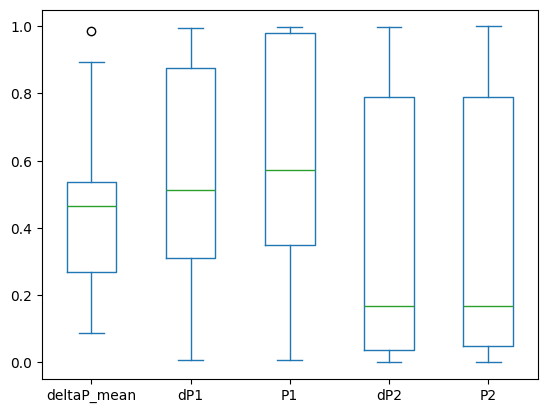

In [54]:
top_all_blind.filter(like='P').plot(kind='box')


<Axes: >

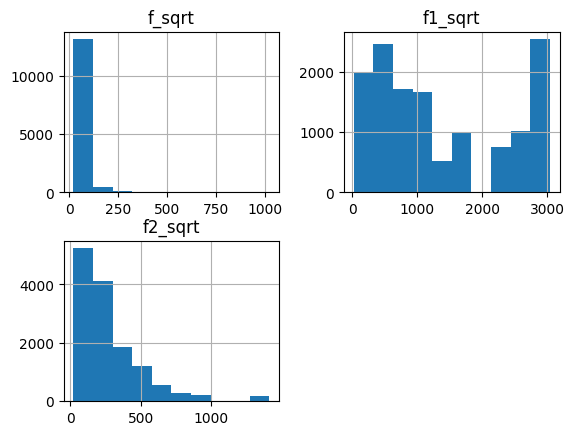

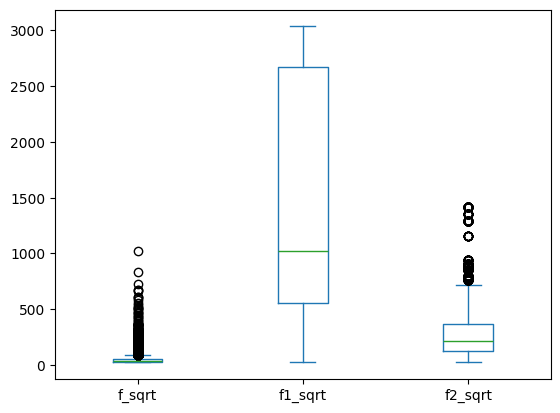

In [55]:
sqrt_f_cols = all_blind.filter(like='sqrt')
sqrt_f_cols.hist()
sqrt_f_cols.plot(kind = 'box')
# all_blind.plot(y='f_sqrt', x='f1_sqrt', kind='scatter')
# all_blind.plot(y='f_sqrt', x='f2_sqrt', kind='scatter')


<Axes: xlabel='P1', ylabel='f_sqrt'>

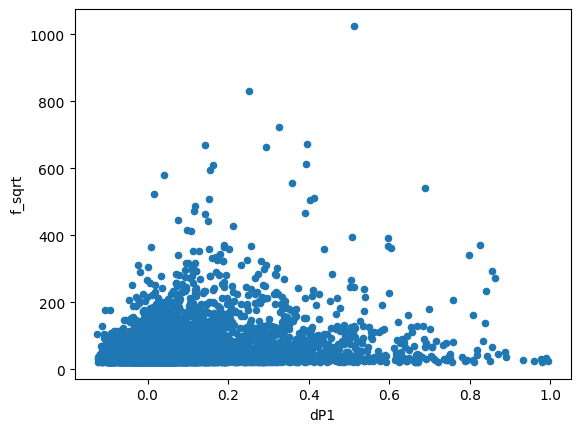

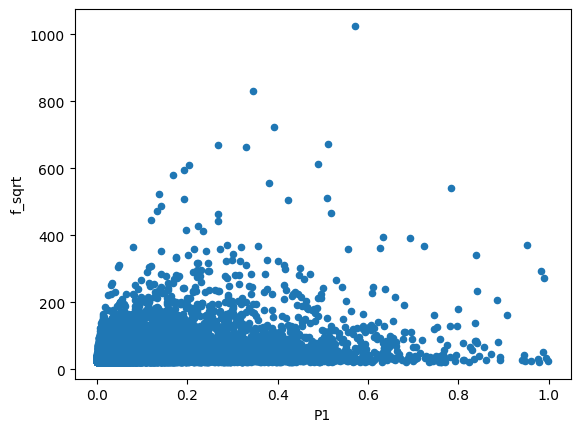

In [56]:
all_blind.plot(y='f_sqrt', x='dP1', kind='scatter')
all_blind.plot(y='f_sqrt', x='P1', kind='scatter')


<Axes: xlabel='P2', ylabel='f_sqrt'>

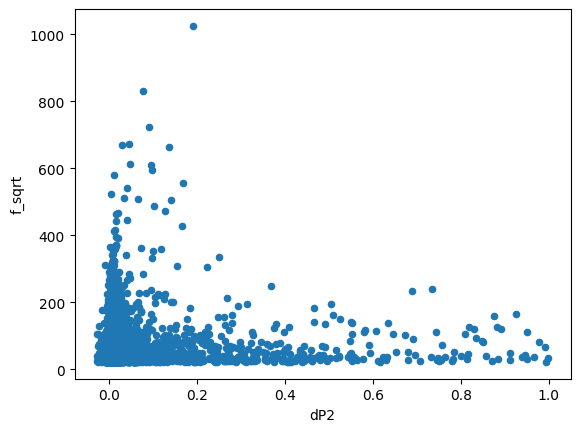

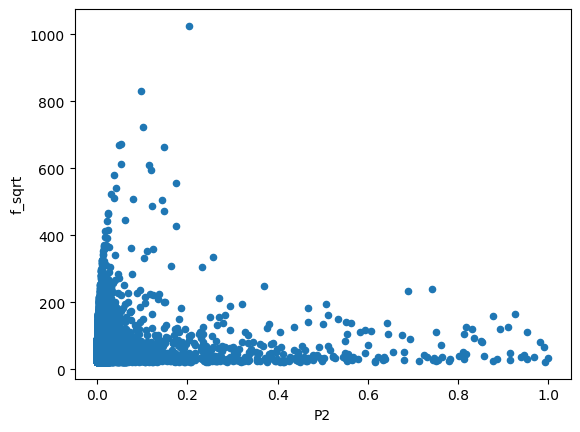

In [57]:
all_blind.plot(y='f_sqrt', x='dP2', kind='scatter')
all_blind.plot(y='f_sqrt', x='P2', kind='scatter')

<Axes: xlabel='f_sqrt', ylabel='LRC'>

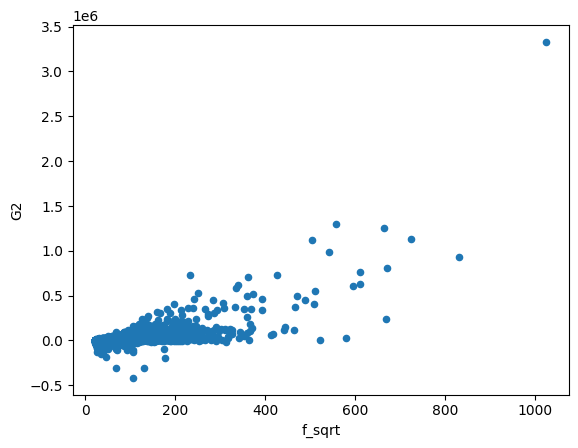

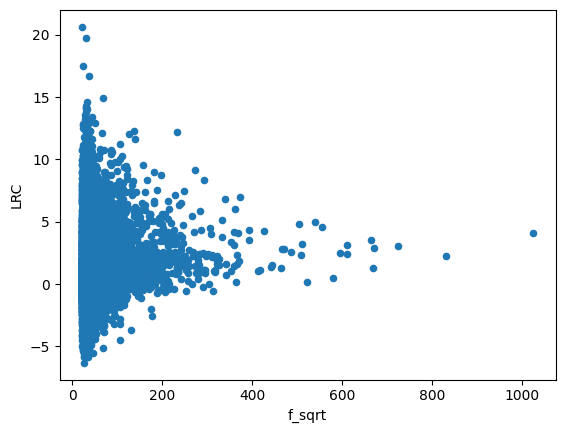

In [58]:
all_blind.plot(kind='scatter', x='f_sqrt', y='G2')
all_blind.plot(kind='scatter', x='f_sqrt', y='LRC')


<Axes: xlabel='f_sqrt', ylabel='deltaP_mean'>

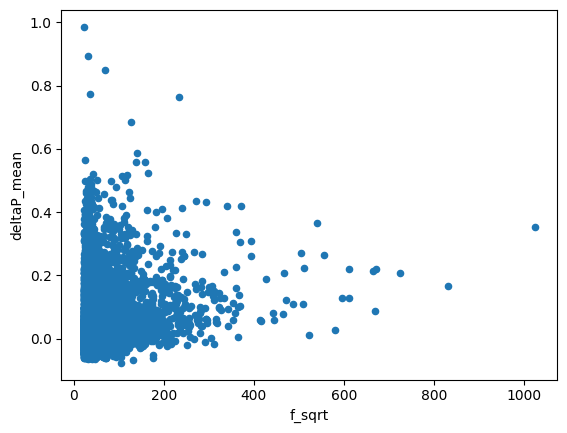

In [59]:
all_blind.plot(kind='scatter', x='f_sqrt', y='deltaP_mean')

<Axes: >

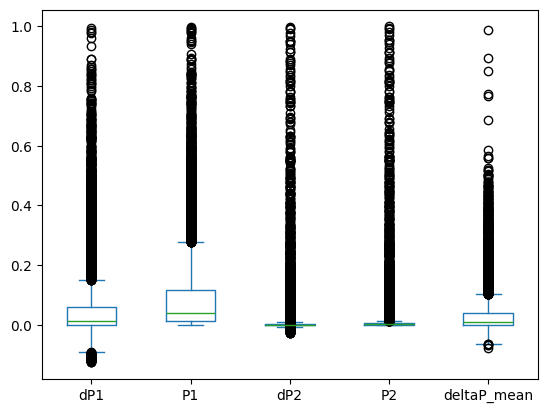

In [60]:
all_blind.filter(like='P').plot(kind='box')

## Superset Polarity of Bigrams

In [61]:
all_polar_bigram = adjust_am_names(pd.read_parquet(
    AM_DF_DIR.joinpath(
        'polar/RBdirect/bigram/extra/polarized-bigram_ALL-direct_min300x_extra.parq'),
    engine='pyarrow',
    columns=FOCUS_DICT['NEQ']['polar+sqrt'], #NEQ on purpose to get full selection for comparison
    filters=[('adv', 'not in', NEG_WORDS)]))
all_polar_bigram = all_polar_bigram.join(
    all_polar_bigram.filter(regex=r'ad._total').apply(
        lambda c: c.apply(sqrt)), 
    rsuffix='_sqrt')
all_polar_bigram

,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,...,P2,adv,adv_total,adj,adj_total,f_sqrt,f1_sqrt,f2_sqrt,adv_total_sqrt,adj_total_sqrt
key,,,,,,,,,,,,,,,,,,,,,
COM~increasingly_difficult,18107,0.04,5.44,1.00,"1,633.63",COMPLEMENT,increasingly_difficult,68787692,18107,71961373,...,0.00,increasingly,"373,633.00",difficult,"729,385.00",134.56,"8,293.83",134.56,611.26,854.04
COM~most_incredible,10137,0.04,4.60,1.00,914.52,COMPLEMENT,most_incredible,68787692,10137,71961373,...,0.00,most,"7,120,428.00",incredible,"44,154.00",100.68,"8,293.83",100.68,"2,668.41",210.13
COM~relatively_minor,8679,0.04,4.37,1.00,782.97,COMPLEMENT,relatively_minor,68787692,8679,71961373,...,0.00,relatively,"582,383.00",minor,"33,707.00",93.16,"8,293.83",93.16,763.14,183.59
COM~now_defunct,7390,0.04,4.14,1.00,666.68,COMPLEMENT,now_defunct,68787692,7390,71961373,...,0.00,now,"433,043.00",defunct,"8,807.00",85.97,"8,293.83",85.97,658.06,93.85
COM~pretty_little,7021,0.04,4.07,1.00,633.39,COMPLEMENT,pretty_little,68787692,7021,71961373,...,0.00,pretty,"1,507,900.00",little,"419,144.00",83.79,"8,293.83",83.79,"1,227.97",647.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEG~even_better,356,-0.04,-3.64,0.00,"-8,962.01",NEGATED,even_better,3173681,129377,71961373,...,0.00,even,"1,040,332.00",better,"600,470.00",18.87,"1,781.48",359.69,"1,019.97",774.90
NEG~most_likely,463,-0.04,-3.74,0.00,"-12,115.08",NEGATED,most_likely,3173681,173625,71961373,...,0.00,most,"7,120,428.00",likely,"884,149.00",21.52,"1,781.48",416.68,"2,668.41",940.29
NEG~most_popular,610,-0.04,-4.49,0.00,"-28,507.43",NEGATED,most_popular,3173681,373799,71961373,...,0.00,most,"7,120,428.00",popular,"765,023.00",24.70,"1,781.48",611.39,"2,668.41",874.66


In [62]:
all_polar_bigram.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20954 entries, COM~increasingly_difficult to NEG~most_important
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   f               20954 non-null  int32   
 1   dP1             20954 non-null  float32 
 2   LRC             20954 non-null  float32 
 3   P1              20954 non-null  float32 
 4   G2              20954 non-null  float64 
 5   l1              20954 non-null  category
 6   l2              20954 non-null  string  
 7   f1              20954 non-null  int32   
 8   f2              20954 non-null  int32   
 9   N               20954 non-null  int32   
 10  exp_f           20954 non-null  float64 
 11  unexp_f         20954 non-null  float64 
 12  unexp_r         20954 non-null  float32 
 13  dP2             20954 non-null  float32 
 14  P2              20954 non-null  float32 
 15  adv             20954 non-null  category
 16  adv_total       20954 non

In [63]:
print('ALL sqrt transformed frequencies')
# all_polar_bigram.filter(regex='^f').apply(lambda c: c.apply(sqrt)).hist()
all_polar_bigram.filter(like='sqrt')

ALL sqrt transformed frequencies


,f_sqrt,f1_sqrt,f2_sqrt,adv_total_sqrt,adj_total_sqrt
key,,,,,
COM~increasingly_difficult,134.56,"8,293.83",134.56,611.26,854.04
COM~most_incredible,100.68,"8,293.83",100.68,"2,668.41",210.13
COM~relatively_minor,93.16,"8,293.83",93.16,763.14,183.59
COM~now_defunct,85.97,"8,293.83",85.97,658.06,93.85
COM~pretty_little,83.79,"8,293.83",83.79,"1,227.97",647.41
...,...,...,...,...,...
NEG~even_better,18.87,"1,781.48",359.69,"1,019.97",774.90
NEG~most_likely,21.52,"1,781.48",416.68,"2,668.41",940.29
NEG~most_popular,24.70,"1,781.48",611.39,"2,668.41",874.66


<Axes: title={'center': 'ALL Superset Positive Probabilities'}>

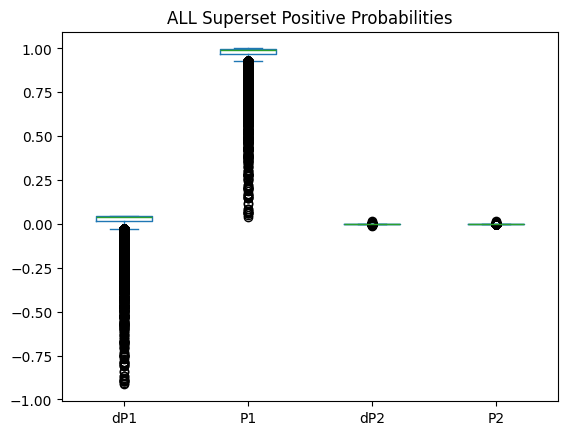

In [64]:
all_polar_bigram.filter(like='P').filter(like='COM', axis=0).plot(kind='box', title='ALL Superset Positive Probabilities')


array([[<Axes: title={'center': 'P1'}>, <Axes: title={'center': 'P2'}>]],
      dtype=object)

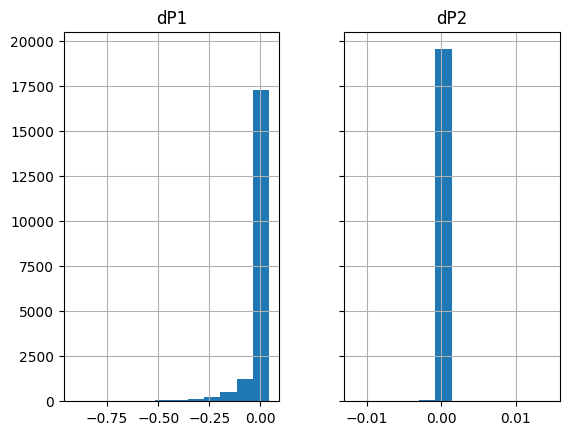

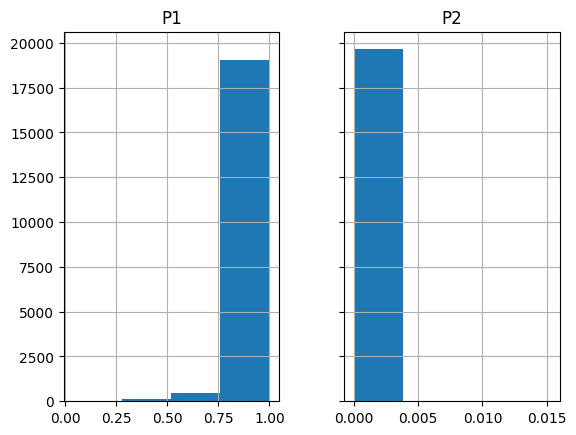

In [65]:
all_polar_bigram.filter(like='dP').filter(like='COM', axis=0).hist(sharey=True, bins=12)
all_polar_bigram.filter(regex='^P').filter(like='COM', axis=0).hist(sharey=True, bins=4)


array([[<Axes: title={'center': 'dP1'}>, <Axes: title={'center': 'P1'}>],
       [<Axes: title={'center': 'dP2'}>, <Axes: title={'center': 'P2'}>]],
      dtype=object)

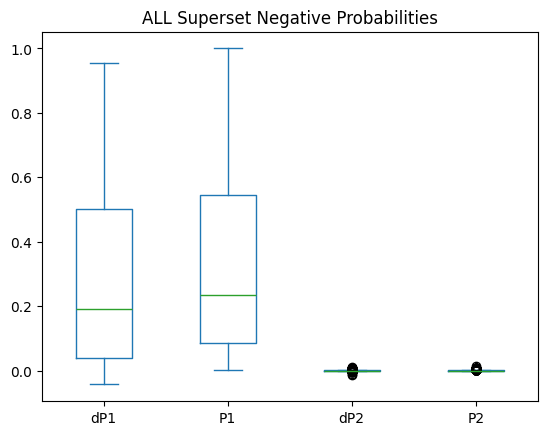

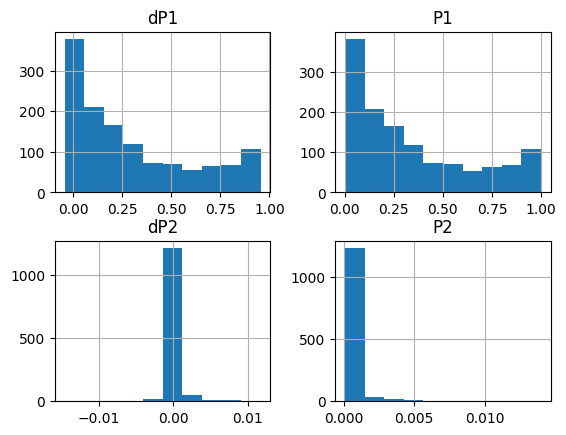

In [66]:
all_polar_bigram.filter(like='P').filter(like='NEG', axis=0).plot(kind='box', title='ALL Superset Negative Probabilities')
all_polar_bigram.filter(like='P').filter(like='NEG', axis=0).hist()

<Axes: xlabel='f', ylabel='dP2'>

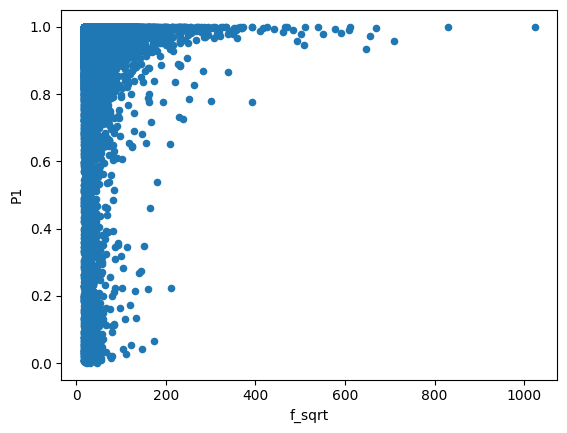

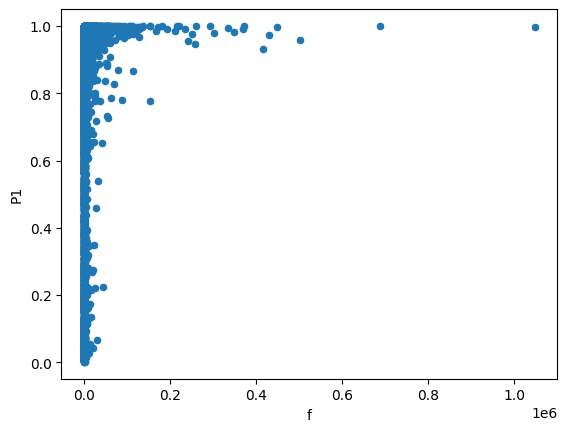

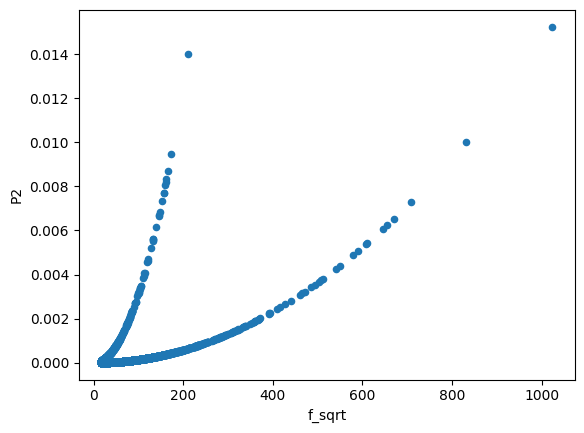

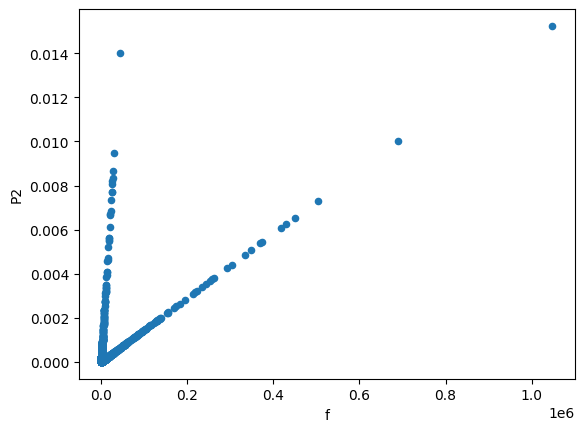

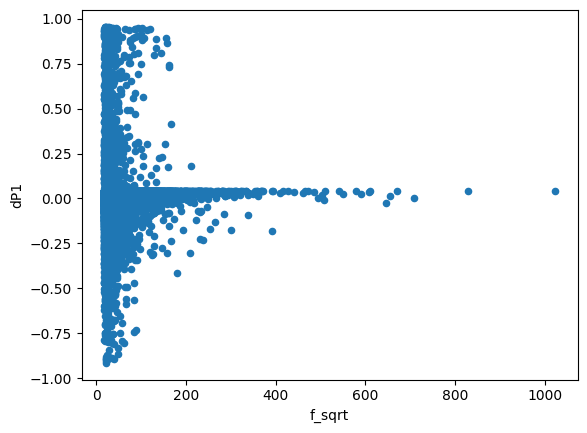

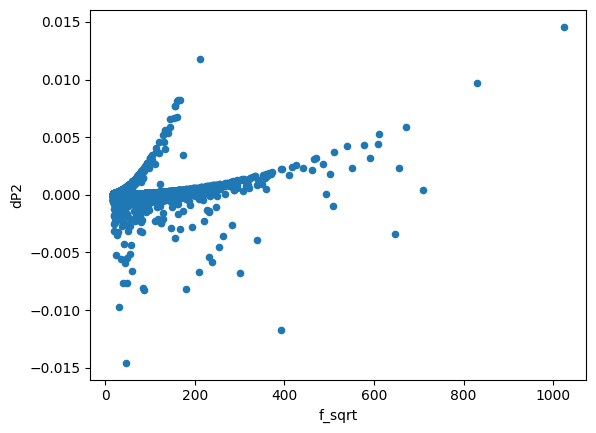

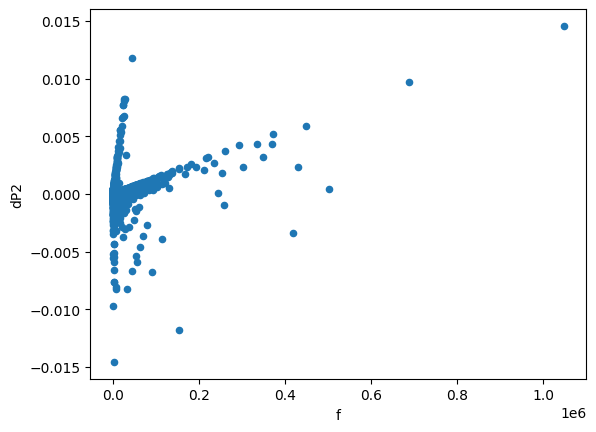

In [67]:
all_polar_bigram.plot(x='f_sqrt', y='P1', kind='scatter')
all_polar_bigram.plot(x='f', y='P1', kind='scatter')
all_polar_bigram.plot(x='f_sqrt', y='P2', kind='scatter')
all_polar_bigram.plot(x='f', y='P2', kind='scatter')
all_polar_bigram.plot(x='f_sqrt', y='dP1', kind='scatter')
all_polar_bigram.plot(x='f_sqrt', y='dP2', kind='scatter')
all_polar_bigram.plot(x='f', y='dP2', kind='scatter')

In [68]:
neq_polar_bigram = adjust_am_names(pd.read_parquet(
    AM_DF_DIR.joinpath(
        'polar/RBdirect/bigram/extra/polarized-bigram_NEQ-direct_min100x_extra.parq'),
    engine='pyarrow',
    columns=FOCUS_DICT['NEQ']['polar+sqrt'], 
    filters=[('adv', 'not in', NEG_WORDS)]))
neq_polar_bigram

,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,...,unexp_r,dP2,P2,adv,adv_total,adj,adj_total,f_sqrt,f1_sqrt,f2_sqrt
key,,,,,,,,,,,,,,,,,,,,,
COM~increasingly_difficult,853,0.50,5.58,1.00,"1,182.62",COMPLEMENT,increasingly_difficult,3173681,853,6347362,...,0.50,0.00,0.00,increasingly,"17,212.00",difficult,"61,518.00",29.21,"1,781.48",29.21
COM~most_incredible,466,0.50,4.69,1.00,646.05,COMPLEMENT,most_incredible,3173681,466,6347362,...,0.50,0.00,0.00,most,"346,992.00",incredible,"2,424.00",21.59,"1,781.48",21.59
COM~relatively_minor,406,0.50,4.49,1.00,562.86,COMPLEMENT,relatively_minor,3173681,406,6347362,...,0.50,0.00,0.00,relatively,"26,947.00",minor,"1,736.00",20.15,"1,781.48",20.15
COM~now_defunct,339,0.50,4.22,1.00,469.97,COMPLEMENT,now_defunct,3173681,339,6347362,...,0.50,0.00,0.00,now,"20,566.00",defunct,427.00,18.41,"1,781.48",18.41
COM~pretty_little,332,0.50,4.19,1.00,460.27,COMPLEMENT,pretty_little,3173681,332,6347362,...,0.50,0.00,0.00,pretty,"71,559.00",little,"21,336.00",18.22,"1,781.48",18.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEG~most_important,936,-0.47,-4.82,0.03,"-36,844.72",NEGATED,most_important,3173681,32595,6347362,...,-16.41,-0.01,0.00,most,"346,992.00",important,"138,658.00",30.59,"1,781.48",180.54
NEG~most_famous,129,-0.48,-5.12,0.02,"-8,733.43",NEGATED,most_famous,3173681,7228,6347362,...,-27.02,-0.00,0.00,most,"346,992.00",famous,"13,802.00",11.36,"1,781.48",85.02
NEG~even_more,118,-0.49,-5.47,0.01,"-10,598.15",NEGATED,even_more,3173681,8535,6347362,...,-35.17,-0.00,0.00,even,"122,338.00",more,"45,770.00",10.86,"1,781.48",92.39


NEQ sqrt transformed frequencies


array([[<Axes: title={'center': 'f_sqrt'}>,
        <Axes: title={'center': 'f1_sqrt'}>],
       [<Axes: title={'center': 'f2_sqrt'}>, <Axes: >]], dtype=object)

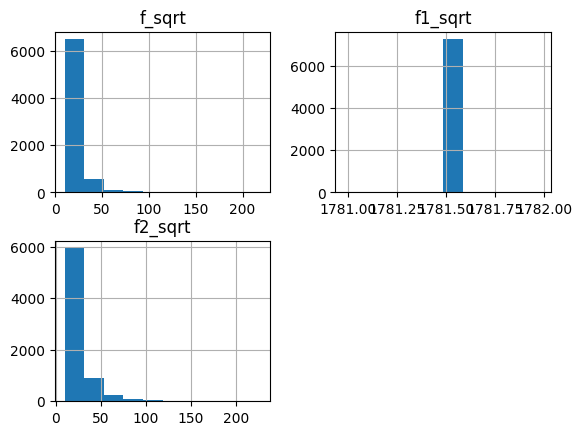

In [69]:
print('NEQ sqrt transformed frequencies')
neq_polar_bigram.filter(like='sqrt').hist()


array([[<Axes: title={'center': 'dP1'}>, <Axes: title={'center': 'P1'}>],
       [<Axes: title={'center': 'dP2'}>, <Axes: title={'center': 'P2'}>]],
      dtype=object)

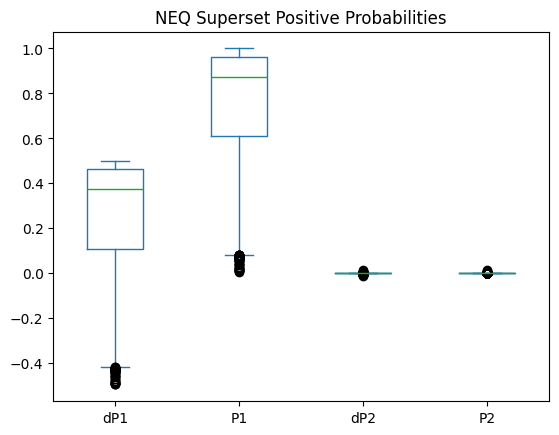

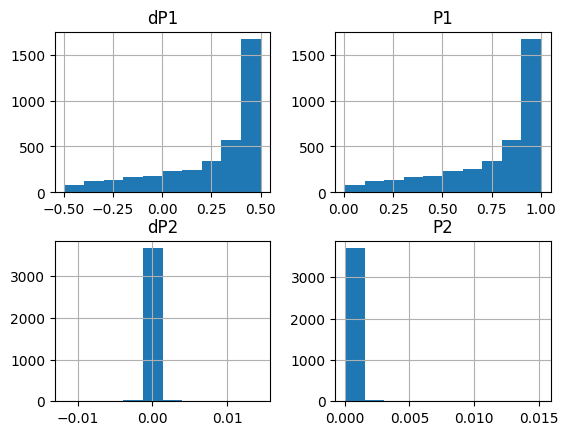

In [70]:
neq_polar_bigram.filter(like='P').filter(like='COM', axis=0).plot(kind='box', title='NEQ Superset Positive Probabilities')
neq_polar_bigram.filter(like='P').filter(like='COM', axis=0).hist()


array([[<Axes: title={'center': 'dP1'}>, <Axes: title={'center': 'P1'}>],
       [<Axes: title={'center': 'dP2'}>, <Axes: title={'center': 'P2'}>]],
      dtype=object)

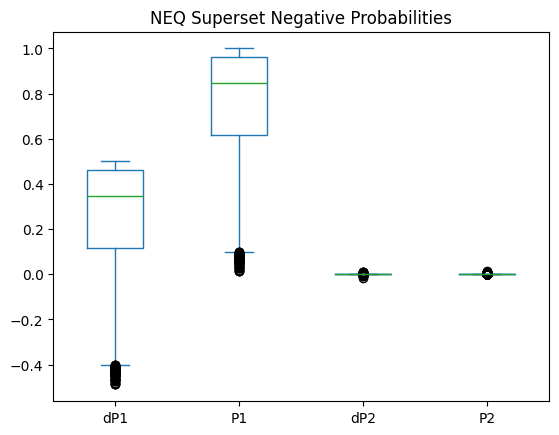

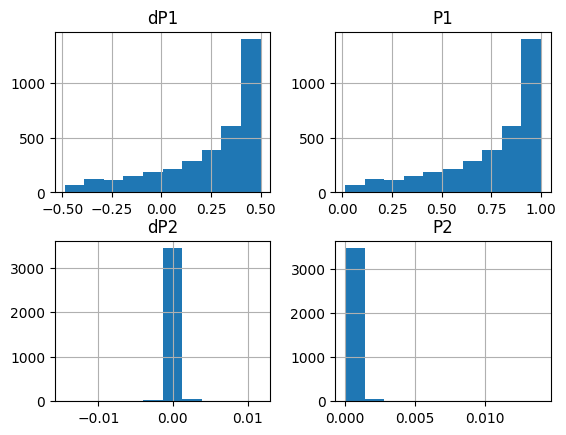

In [71]:
neq_polar_bigram.filter(like='P').filter(like='NEG', axis=0).plot(kind='box', title='NEQ Superset Negative Probabilities')
neq_polar_bigram.filter(like='P').filter(like='NEG', axis=0).hist()

In [72]:
show_combined_top(all_polar_bigram, tie_breaker='LRC', 
                  metric_cols=('LRC', 'dP1', 'P1', 'G2'), polar=True)



**Complement**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                        | `top_for`   |    `f` |   `LRC` |   `dP1` |   `P1` |   `G2` | `l1`       |
|:-----------------------------|:------------|-------:|--------:|--------:|-------:|-------:|:-----------|
| *COM increasingly_difficult* | `P1`        | 18,107 |   5.436 |   0.044 |      1 |  1,633 | COMPLEMENT |
| *COM most_incredible*        | `P1`        | 10,137 |   4.598 |   0.044 |      1 |    914 | COMPLEMENT |


**Negated**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                       | `top_for`     |    `f` |   `LRC` |   `dP1` |   `P1` |    `G2` | `l1`    |
|:----------------------------|:--------------|-------:|--------:|--------:|-------:|--------:|:--------|
| *NEG so_sure*               | *`G2`*        | 26,480 |   6.123 |   0.732 |  0.776 | 129,884 | NEGATED |
| *NEG quite_sure*            | *`G2`*        | 26,026 |   6.218 |   0.744 |  0.788 | 129,12

,key,top_for,LRC,dP1,P1,G2,f,f1,f2,l1,l2,f_sqrt
0,NEG so_sure,`G2`,6.12,0.73,0.78,129884,26480,3173681,34127,NEGATED,so_sure,162.73
1,NEG quite_sure,`G2`,6.22,0.74,0.79,129128,26026,3173681,33043,NEGATED,quite_sure,161.33
2,NEG always_easy,`G2`,7.64,0.87,0.91,137118,24459,3173681,26815,NEGATED,always_easy,156.39
3,NEG immediately_clear,`G2`,8.17,0.90,0.94,140793,24416,3173681,26002,NEGATED,immediately_clear,156.26
4,NEG immediately_available,`G2`,6.80,0.81,0.85,111188,21078,3173681,24769,NEGATED,immediately_available,145.18
5,COM increasingly_difficult,`P1`,5.44,0.04,1.00,1633,18107,68787692,18107,COMPLEMENT,increasingly_difficult,134.56
6,NEG even_sure,`LRC`,10.05,0.94,0.99,88225,14459,3173681,14659,NEGATED,even_sure,120.25
7,NEG entirely_sure,`LRC`,9.87,0.94,0.98,78686,12931,3173681,13135,NEGATED,entirely_sure,113.71
8,NEG yet_clear,`LRC`,10.82,0.95,0.99,64207,10406,3173681,10471,NEGATED,yet_clear,102.01
9,COM most_incredible,`P1`,4.60,0.04,1.00,914,10137,68787692,10137,COMPLEMENT,most_incredible,100.68


In [73]:
pol_big_top = show_combined_top(all_polar_bigram, k=5, 
                  metric_cols=('f', 'LRC', 'dP1', 'P1', 'dP2', 'P2', 'G2', 
                               'f2', 'adv_total', 'adj_total', 'unexp_f', 'unexp_r'), 
                  tie_breaker='LRC')


Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                        | `top_for`                                        |       `f` |   `LRC` |   `dP1` |   `P1` |   `dP2` |   `P2` |    `G2` |      `f2` |   `adv_total` |   `adj_total` |   `unexp_f` |   `unexp_%` |
|:-----------------------------|:-------------------------------------------------|----------:|--------:|--------:|-------:|--------:|-------:|--------:|----------:|--------------:|--------------:|------------:|------------:|
| *COM so_many*                | *`f`; `dP2`; `P2`; `f2`; `unexp_f`*              | 1,047,841 |   4.351 |   0.043 |  0.998 |   0.015 |  0.015 |  78,025 | 1,049,935 |     5,173,538 |     1,835,842 |  44,210.800 |       4.219 |
| *COM most_important*         | *`f`; `dP2`; `P2`; `f2`; `adj_total`; `unexp_f`* |   689,158 |   4.822 |   0.043 |  0.999 |   0.010 |  0.010 |  54,068 |   690,094 |     7,120,428 |     2,001,942 |  29,498.910 |       4.280 |
| *COM so_much*               

In [74]:

show_combined_top(all_polar_bigram, k=3, metric_cols=('f', 'f2', 'adv_total', 'adj_total', 'unexp_f', 'unexp_r'), 
                  tie_breaker='LRC', polar=True)



**Complement**: Top 3 Values of Assorted AMs, by descending raw joint frequency

| `key`                | `top_for`              |       `f` |      `f2` |   `adv_total` |   `adj_total` |   `unexp_f` |   `unexp_%` |   `LRC` | `l1`       |
|:---------------------|:-----------------------|----------:|----------:|--------------:|--------------:|------------:|------------:|--------:|:-----------|
| *COM so_many*        | *`f`; `f2`; `unexp_f`* | 1,047,841 | 1,049,935 |     5,173,538 |     1,835,842 |  44,210.800 |       4.219 |   4.351 | COMPLEMENT |
| *COM most_important* | *`f`; `f2`; `unexp_f`* |   689,158 |   690,094 |     7,120,428 |     2,001,942 |  29,498.910 |       4.280 |   4.822 | COMPLEMENT |
| *COM so_much*        | *`f`*                  |   502,631 |   524,372 |     5,173,538 |     1,336,122 |   1,385.150 |       0.276 |   0.036 | COMPLEMENT |
| *COM very_little*    | *`adv_total`*          |   217,044 |   217,106 |     9,220,012 |       419,144 |   9,512.930 |       4.383 |

,key,top_for,f,f2,adv_total,adj_total,unexp_f,unexp_%,f1,LRC,l1,l2,f_sqrt
0,COM so_many,`f`; `f2`; `unexp_f`,1047841,1049935,5173538,1835842,"44,210.80",4.22,68787692,4.35,COMPLEMENT,so_many,"1,023.64"
3,COM most_important,`f`; `f2`; `unexp_f`,689158,690094,7120428,2001942,"29,498.91",4.28,68787692,4.82,COMPLEMENT,most_important,830.16
6,COM so_much,`f`,502631,524372,5173538,1336122,"1,385.15",0.28,68787692,0.04,COMPLEMENT,so_much,708.96
7,COM very_little,`adv_total`,217044,217106,9220012,419144,"9,512.93",4.38,68787692,6.38,COMPLEMENT,very_little,465.88
8,COM very_few,`adv_total`,154866,154917,9220012,244679,"6,781.24",4.38,68787692,6.09,COMPLEMENT,very_few,393.53
9,COM very_own,`adv_total`,86199,86224,9220012,87772,"3,777.70",4.38,68787692,5.90,COMPLEMENT,very_own,293.60
10,COM also_important,`adj_total`,64102,64138,1064426,2001942,"2,792.65",4.36,68787692,5.15,COMPLEMENT,also_important,253.18
11,NEG as_good,`unexp_f`,44441,197963,3231640,1670122,"35,710.32",80.35,3173681,2.60,NEGATED,as_good,210.81
12,NEG that_important,`adj_total`,5509,6890,206801,2001942,"5,205.13",94.48,3173681,6.19,NEGATED,that_important,74.22
13,NEG only_important,`adj_total`,2739,3842,432612,2001942,"2,569.56",93.81,3173681,5.46,NEGATED,only_important,52.34


In [75]:
import matplotlib as mp
show_combined_top(all_polar_bigram, k=3, 
                  metric_cols=('LRC', 'dP1', 'P1', 'dP2', 'P2', 'G2'), 
                  tie_breaker='f2').filter(['dP1', 'P1', 'dP2', 'P2'])

show_combined_top(neq_polar_bigram, k=5, 
                  metric_cols=('f', 'LRC', 'dP1', 'P1', 'dP2', 'P2', 'G2'), 
                  tie_breaker='f2')


Top 3 Values of Assorted AMs, by descending raw joint frequency

| `key`                        | `top_for`     |       `f` |   `LRC` |   `dP1` |   `P1` |   `dP2` |   `P2` |    `G2` |      `f2` |
|:-----------------------------|:--------------|----------:|--------:|--------:|-------:|--------:|-------:|--------:|----------:|
| *COM so_many*                | *`dP2`; `P2`* | 1,047,841 |   4.351 |   0.043 |  0.998 |   0.015 |  0.015 |  78,025 | 1,049,935 |
| *COM most_important*         | *`dP2`; `P2`* |   689,158 |   4.822 |   0.043 |  0.999 |   0.010 |  0.010 |  54,068 |   690,094 |
| *NEG as_good*                | *`dP2`; `P2`* |    44,441 |   2.605 |   0.181 |  0.224 |   0.012 |  0.014 |  80,849 |   197,963 |
| *NEG so_sure*                | *`G2`*        |    26,480 |   6.123 |   0.732 |  0.776 |   0.008 |  0.008 | 129,884 |    34,127 |
| *NEG always_easy*            | *`G2`*        |    24,459 |   7.637 |   0.868 |  0.912 |   0.008 |  0.008 | 137,118 |    26,815 |
| *NEG immediatel

,key,top_for,f,LRC,dP1,P1,dP2,P2,G2,f1,f2,l1,l2,f_sqrt
0,COM so_many,`f`; `dP2`; `P2`; `G2`,48117,4.35,0.46,0.96,0.01,0.02,52538,3173681,50211,COMPLEMENT,so_many,219.36
4,NEG as_good,`f`; `dP2`; `P2`,44441,2.54,0.37,0.86,0.01,0.01,30321,3173681,51552,NEGATED,as_good,210.81
7,COM most_important,`f`; `dP2`; `P2`; `G2`,31659,4.82,0.47,0.97,0.01,0.01,36844,3173681,32595,COMPLEMENT,most_important,177.93
11,NEG very_good,`f`; `P2`,30092,0.56,0.11,0.61,0.00,0.01,2349,3173681,49486,NEGATED,very_good,173.47
13,NEG as_bad,`f`; `dP2`; `P2`,27548,3.98,0.45,0.95,0.01,0.01,28483,3173681,29066,NEGATED,as_bad,165.98
16,NEG so_sure,`dP2`; `G2`,26480,5.81,0.49,0.99,0.01,0.01,33518,3173681,26837,NEGATED,so_sure,162.73
18,NEG quite_sure,`G2`,26026,5.88,0.49,0.99,0.01,0.01,33102,3173681,26355,NEGATED,quite_sure,161.33
19,NEG immediately_clear,`G2`,24416,7.74,0.50,1.00,0.01,0.01,33183,3173681,24476,NEGATED,immediately_clear,156.26
20,NEG even_sure,`LRC`; `dP1`,14459,8.38,0.50,1.00,0.00,0.00,19899,3173681,14471,NEGATED,even_sure,120.25
22,NEG entirely_sure,`LRC`,12931,8.22,0.50,1.00,0.00,0.00,17777,3173681,12943,NEGATED,entirely_sure,113.71


In [76]:
show_combined_top(neq_polar_bigram, k=3, metric_cols=('f', 'f2', 'adv_total', 'adj_total', 'unexp_f', 'unexp_r'), 
                  tie_breaker='LRC', polar=True)


**Complement**: Top 3 Values of Assorted AMs, by descending raw joint frequency

| `key`                | `top_for`              |    `f` |   `f2` |   `adv_total` |   `adj_total` |   `unexp_f` |   `unexp_%` |   `LRC` | `l1`       |
|:---------------------|:-----------------------|-------:|-------:|--------------:|--------------:|------------:|------------:|--------:|:-----------|
| *COM so_many*        | *`f`; `f2`; `unexp_f`* | 48,117 | 50,211 |       566,272 |        97,776 |  23,011.500 |      47.824 |   4.348 | COMPLEMENT |
| *COM most_important* | *`f`; `unexp_f`*       | 31,659 | 32,595 |       346,992 |       138,658 |  15,361.500 |      48.522 |   4.824 | COMPLEMENT |
| *COM pretty_good*    | *`adj_total`*          | 10,139 | 10,271 |        71,559 |       202,048 |   5,003.500 |      49.349 |   5.614 | COMPLEMENT |
| *COM as_good*        | *`f2`*                 |  7,111 | 51,552 |       656,683 |       202,048 | -18,665.000 |    -262.481 |  -2.543 | COMPLEMENT |
| *COM as_li

,key,top_for,f,f2,adv_total,adj_total,unexp_f,unexp_%,f1,LRC,l1,l2,f_sqrt
0,COM so_many,`f`; `f2`; `unexp_f`,48117,50211,566272,97776,"23,011.50",47.82,3173681,4.35,COMPLEMENT,so_many,219.36
3,NEG as_good,`f`; `f2`; `unexp_f`,44441,51552,656683,202048,"18,665.00",42.00,3173681,2.54,NEGATED,as_good,210.81
6,COM most_important,`f`; `unexp_f`,31659,32595,346992,138658,"15,361.50",48.52,3173681,4.82,COMPLEMENT,most_important,177.93
8,NEG that_good,`adj_total`,10610,10932,166680,202048,"5,144.00",48.48,3173681,4.61,NEGATED,that_good,103.00
9,COM pretty_good,`adj_total`,10139,10271,71559,202048,"5,003.50",49.35,3173681,5.61,COMPLEMENT,pretty_good,100.69
10,COM as_good,`f2`,7111,51552,656683,202048,"-18,665.00",-262.48,3173681,-2.54,COMPLEMENT,as_good,84.33
11,NEG too_surprising,`unexp_%`,4014,4014,433149,18886,"2,007.00",50.00,3173681,7.82,NEGATED,too_surprising,63.36
12,COM as_little,`adv_total`,3032,3087,656683,21336,"1,488.50",49.09,3173681,4.81,COMPLEMENT,as_little,55.06
13,NEG as_fortunate,`adv_total`,2164,2181,656683,7911,"1,073.50",49.61,3173681,5.38,NEGATED,as_fortunate,46.52
14,NEG necessarily_indicative,`unexp_%`,1389,1389,42916,2319,694.50,50.00,3173681,6.29,NEGATED,necessarily_indicative,37.27


In [77]:
show_combined_top(neq_polar_bigram, tie_breaker='LRC', 
                  metric_cols=('LRC', 'dP1', 'P1', 'G2'), polar=True)


**Complement**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                | `top_for`   |    `f` |   `LRC` |   `dP1` |   `P1` |   `G2` | `l1`       |
|:---------------------|:------------|-------:|--------:|--------:|-------:|-------:|:-----------|
| *COM so_many*        | `G2`        | 48,117 |   4.348 |   0.462 |  0.958 | 52,538 | COMPLEMENT |
| *COM most_important* | `G2`        | 31,659 |   4.824 |   0.474 |  0.971 | 36,844 | COMPLEMENT |


**Negated**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`                        | `top_for`      |    `f` |   `LRC` |   `dP1` |   `P1` |   `G2` | `l1`    |
|:-----------------------------|:---------------|-------:|--------:|--------:|-------:|-------:|:--------|
| *NEG so_sure*                | *`G2`*         | 26,480 |   5.808 |   0.489 |  0.987 | 33,518 | NEGATED |
| *NEG quite_sure*             | *`G2`*         | 26,026 |   5.885 |   0.490 |  0.988 | 33,102 | NEGATED |
| *NEG immedia

,key,top_for,LRC,dP1,P1,G2,f,f1,f2,l1,l2,f_sqrt
0,COM so_many,`G2`,4.35,0.46,0.96,52538,48117,3173681,50211,COMPLEMENT,so_many,219.36
1,COM most_important,`G2`,4.82,0.47,0.97,36844,31659,3173681,32595,COMPLEMENT,most_important,177.93
2,NEG so_sure,`G2`,5.81,0.49,0.99,33518,26480,3173681,26837,NEGATED,so_sure,162.73
3,NEG quite_sure,`G2`,5.88,0.49,0.99,33102,26026,3173681,26355,NEGATED,quite_sure,161.33
4,NEG immediately_clear,`G2`,7.74,0.50,1.00,33183,24416,3173681,24476,NEGATED,immediately_clear,156.26
5,NEG even_sure,`LRC`; `dP1`,8.38,0.50,1.00,19899,14459,3173681,14471,NEGATED,even_sure,120.25
7,NEG entirely_sure,`LRC`,8.22,0.50,1.00,17777,12931,3173681,12943,NEGATED,entirely_sure,113.71
8,NEG yet_clear,`LRC`; `dP1`,8.43,0.50,1.00,14363,10406,3173681,10411,NEGATED,yet_clear,102.01
10,NEG exactly_sure,`LRC`; `dP1`,8.41,0.50,1.00,12153,8794,3173681,8797,NEGATED,exactly_sure,93.78
12,NEG yet_ready,`LRC`,8.06,0.50,1.00,10344,7501,3173681,7505,NEGATED,yet_ready,86.61


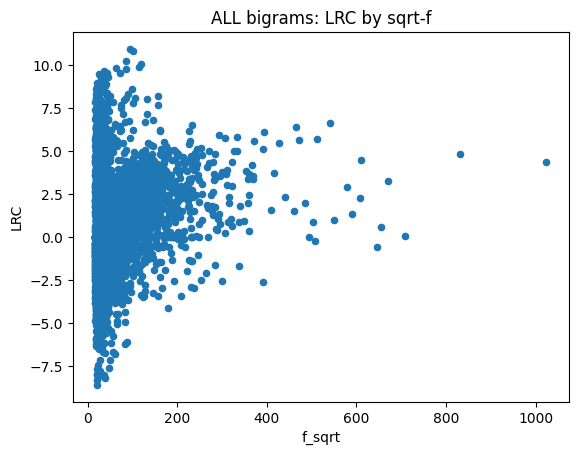

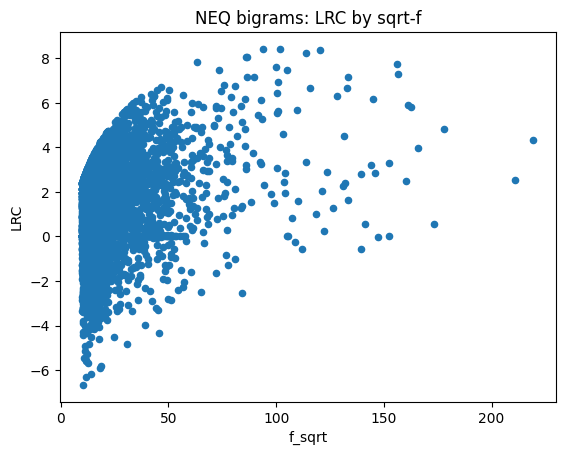

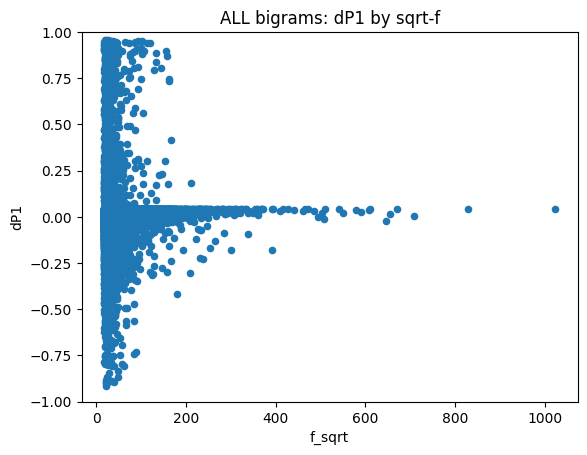

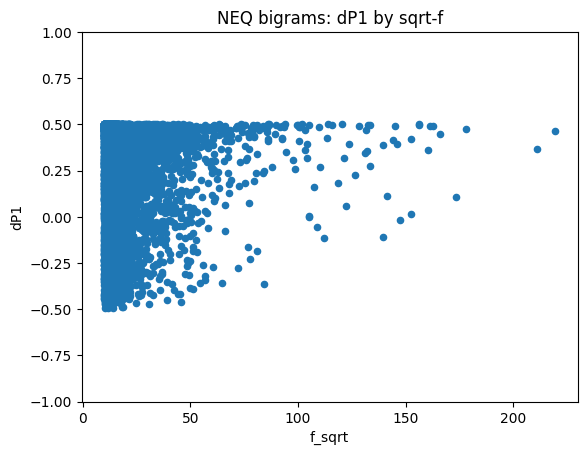

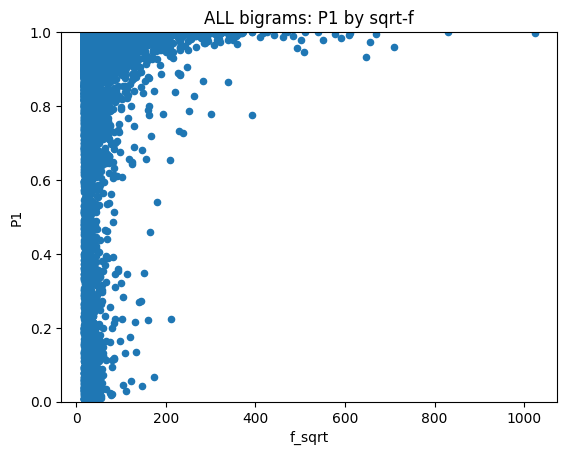

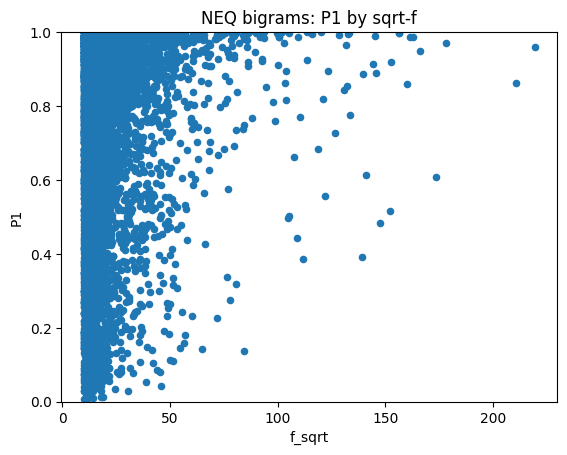

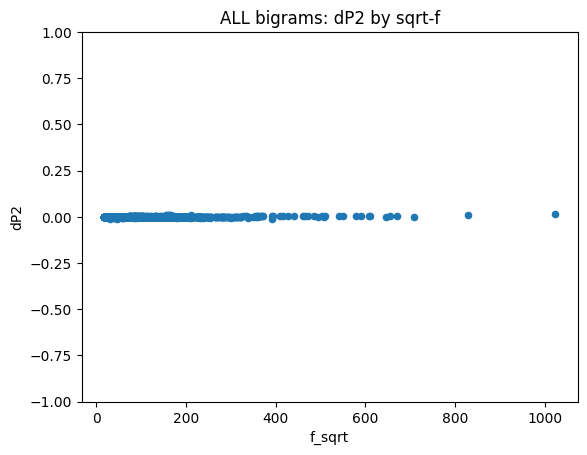

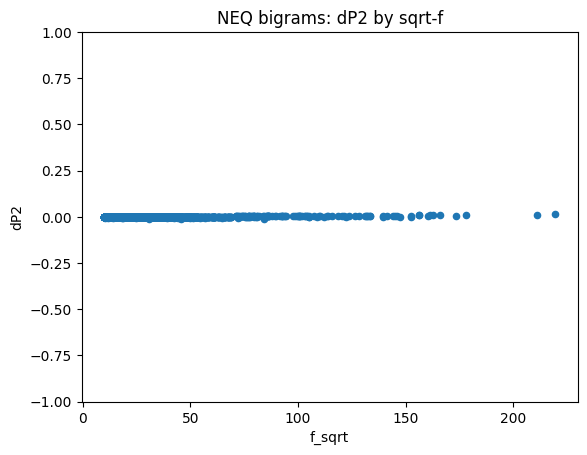

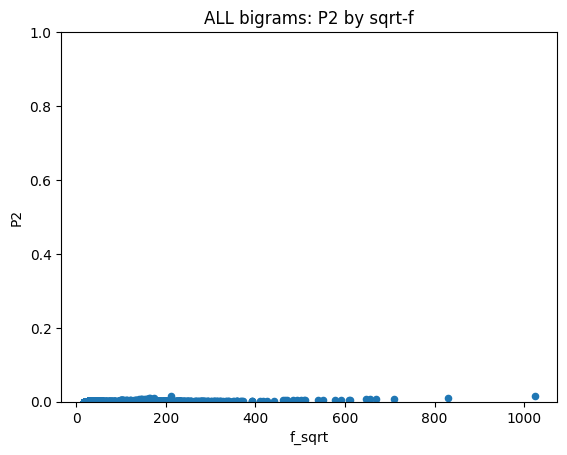

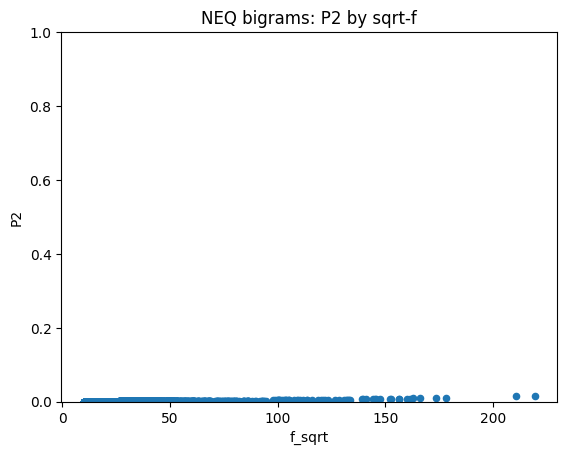

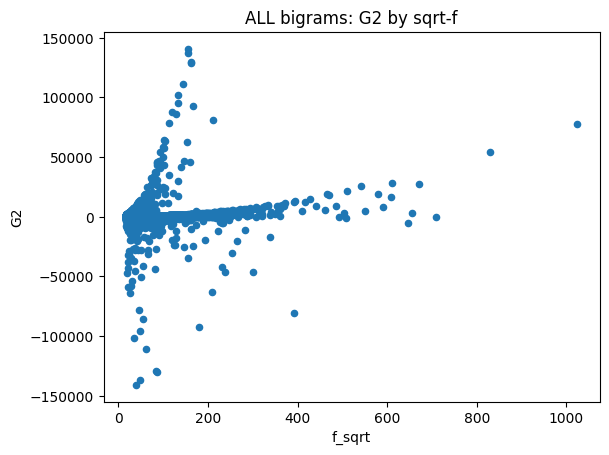

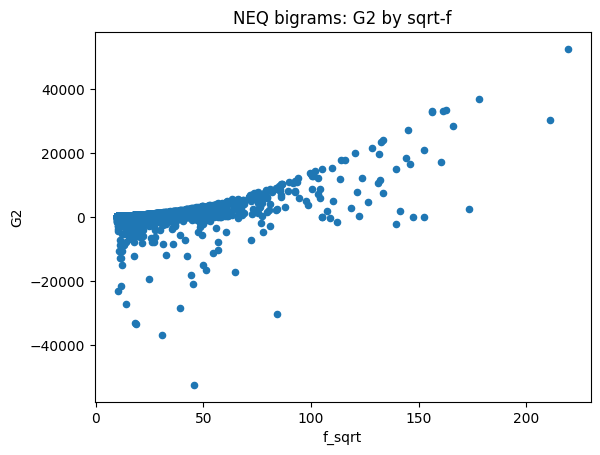

In [78]:
for c in ('LRC', 'dP1', 'P1', 'dP2', 'P2', 'G2'):
    if c.startswith('d'):
        all_polar_bigram.plot(x='f_sqrt', y=c, kind='scatter', ylim=[-1,1], title=f'ALL bigrams: {c} by sqrt-f')
        neq_polar_bigram.plot(x='f_sqrt', y=c, kind='scatter', ylim=[-1,1], title=f'NEQ bigrams: {c} by sqrt-f')
    elif c.startswith('P'):
        all_polar_bigram.plot(x='f_sqrt', y=c, kind='scatter', ylim=[0, 1], title=f'ALL bigrams: {c} by sqrt-f')
        neq_polar_bigram.plot(x='f_sqrt', y=c, kind='scatter', ylim=[0, 1], title=f'NEQ bigrams: {c} by sqrt-f')
    else:
        all_polar_bigram.plot(x='f_sqrt', y=c, kind='scatter', title=f'ALL bigrams: {c} by sqrt-f')
        neq_polar_bigram.plot(x='f_sqrt', y=c, kind='scatter', title=f'NEQ bigrams: {c} by sqrt-f')

## Superset Polarity of Adverbs

In [79]:
all_polar_adv = adjust_am_names(pd.read_parquet(
    AM_DF_DIR.joinpath(
        'polar/RBdirect/adv/extra/polarized-adv_ALL-direct_min300x_extra.parq'),
    engine='pyarrow',
    columns=BASIC_FOCUS, 
    filters=[('l2','not in', NEG_WORDS)]))
all_polar_adv

,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r
key,,,,,,,,,,,,,
COM~most,7101224,0.05,4.04,1.00,"525,721.02",COMPLEMENT,most,68787692,7120428,71961373,"6,806,398.87","294,825.13",0.04
COM~increasingly,373560,0.04,7.04,1.00,"32,850.41",COMPLEMENT,increasingly,68787692,373633,71961373,"357,154.83","16,405.17",0.04
COM~yearly,2474,0.04,2.69,1.00,223.18,COMPLEMENT,yearly,68787692,2474,71961373,"2,364.89",109.11,0.04
COM~legendarily,1007,0.04,1.39,1.00,90.84,COMPLEMENT,legendarily,68787692,1007,71961373,962.59,44.41,0.04
COM~fourth,915,0.04,1.25,1.00,82.54,COMPLEMENT,fourth,68787692,915,71961373,874.65,40.35,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEG~fairly,417,-0.04,-4.99,0.00,"-29,631.19",NEGATED,fairly,3173681,371125,71961373,"16,367.56","-15,950.56",-38.25
NEG~almost,397,-0.04,-5.27,0.00,"-35,325.48",NEGATED,almost,3173681,433607,71961373,"19,123.18","-18,726.18",-47.17
NEG~pretty,1956,-0.04,-4.98,0.00,"-119,539.22",NEGATED,pretty,3173681,1507900,71961373,"66,502.26","-64,546.26",-33.00


In [80]:
show_combined_top(all_polar_adv,tie_breaker='LRC', 
                  metric_cols=('LRC', 'dP1', 'P1', 'G2'), 
                  polar=True)


**Complement**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`              | `top_for`   |       `f` |   `LRC` |   `dP1` |   `P1` |    `G2` | `l1`       |
|:-------------------|:------------|----------:|--------:|--------:|-------:|--------:|:-----------|
| *COM most*         | `G2`        | 7,101,224 |   4.036 |   0.046 |  0.997 | 525,721 | COMPLEMENT |
| *COM relatively*   | `LRC`       |   582,065 |   5.976 |   0.044 |  0.999 |  49,292 | COMPLEMENT |
| *COM increasingly* | `LRC`       |   373,560 |   7.039 |   0.044 |  1.000 |  32,850 | COMPLEMENT |
| *COM yearly*       | `P1`        |     2,474 |   2.690 |   0.044 |  1.000 |     223 | COMPLEMENT |
| *COM legendarily*  | `P1`        |     1,007 |   1.386 |   0.044 |  1.000 |      90 | COMPLEMENT |
| *COM fourth*       | `P1`        |       915 |   1.246 |   0.044 |  1.000 |      82 | COMPLEMENT |
| *COM eagerly*      | `P1`        |       895 |   1.214 |   0.044 |  1.000 |      80 | COMPLEMENT |
| *COM wh

,key,top_for,LRC,dP1,P1,G2,f,f1,f2,l1,l2
0,COM most,`G2`,4.04,0.05,1.00,525721,7101224,68787692,7120428,COMPLEMENT,most
1,COM relatively,`LRC`,5.98,0.04,1.00,49292,582065,68787692,582383,COMPLEMENT,relatively
2,NEG as,`G2`,2.08,0.13,0.16,727572,531731,3173681,3231640,NEGATED,as
3,COM increasingly,`LRC`,7.04,0.04,1.00,32850,373560,68787692,373633,COMPLEMENT,increasingly
4,NEG that,`LRC`; `dP1`; `G2`,6.37,0.75,0.80,831669,164768,3173681,206801,NEGATED,that
7,NEG only,`G2`,2.92,0.22,0.26,242355,113502,3173681,432612,NEGATED,only
8,NEG immediately,`dP1`; `G2`,5.04,0.57,0.61,231721,56099,3173681,91746,NEGATED,immediately
10,NEG yet,`dP1`,4.66,0.50,0.55,197895,51867,3173681,94755,NEGATED,yet
11,NEG exactly,`LRC`; `dP1`,6.19,0.74,0.78,216169,43813,3173681,56109,NEGATED,exactly
13,NEG necessarily,`LRC`; `dP1`,7.15,0.83,0.88,230465,42595,3173681,48641,NEGATED,necessarily


In [81]:
neq_polar_adv = adjust_am_names(pd.read_parquet(
    AM_DF_DIR.joinpath(
        'polar/RBdirect/adv/extra/polarized-adv_NEQ-direct_min300x_extra.parq'),
    engine='pyarrow',
    columns=BASIC_FOCUS, 
    filters=[('l2','not in', NEG_WORDS)]) 
                                )
neq_polar_adv


,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r
key,,,,,,,,,,,,,
COM~increasingly,17139,0.50,7.07,1.00,"22,963.63",COMPLEMENT,increasingly,3173681,17212,6347362,"8,606.00","8,533.00",0.50
COM~albeit,737,0.50,4.93,1.00,986.91,COMPLEMENT,albeit,3173681,740,6347362,370.00,367.00,0.50
COM~presumably,352,0.49,3.84,0.99,457.54,COMPLEMENT,presumably,3173681,355,6347362,177.50,174.50,0.50
COM~relatively,26629,0.49,5.98,0.99,"34,010.20",COMPLEMENT,relatively,3173681,26947,6347362,"13,473.50","13,155.50",0.49
COM~understandably,604,0.49,4.13,0.99,763.18,COMPLEMENT,understandably,3173681,612,6347362,306.00,298.00,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEG~rather,489,-0.47,-4.76,0.03,"-19,395.88",NEGATED,rather,3173681,17167,6347362,"8,583.50","-8,094.50",-16.55
NEG~fairly,417,-0.48,-5.01,0.02,"-20,605.35",NEGATED,fairly,3173681,17680,6347362,"8,840.00","-8,423.00",-20.20
NEG~pretty,1956,-0.48,-4.98,0.03,"-81,991.26",NEGATED,pretty,3173681,71559,6347362,"35,779.50","-33,823.50",-17.29


In [82]:
show_combined_top(neq_polar_adv, tie_breaker='LRC', 
                  metric_cols=('LRC', 'dP1', 'P1', 'G2'), polar=True)


**Complement**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`              | `top_for`            |     `f` |   `LRC` |   `dP1` |   `P1` |    `G2` | `l1`       |
|:-------------------|:---------------------|--------:|--------:|--------:|-------:|--------:|:-----------|
| *COM very*         | *`G2`*               | 416,707 |   1.114 |   0.207 |  0.687 |  95,938 | COMPLEMENT |
| *COM more*         | *`G2`*               | 391,566 |   1.252 |   0.227 |  0.707 | 107,332 | COMPLEMENT |
| *COM most*         | *`G2`*               | 327,788 |   4.038 |   0.470 |  0.945 | 348,424 | COMPLEMENT |
| *COM relatively*   | *`LRC`*              |  26,629 |   5.983 |   0.490 |  0.988 |  34,010 | COMPLEMENT |
| *COM increasingly* | *`LRC`; `dP1`; `P1`* |  17,139 |   7.070 |   0.497 |  0.996 |  22,963 | COMPLEMENT |
| *COM albeit*       | *`dP1`; `P1`*        |     737 |   4.931 |   0.496 |  0.996 |     986 | COMPLEMENT |
| *COM presumably*   | *`dP1`; `P1`*        |     352 

,key,top_for,LRC,dP1,P1,G2,f,f1,f2,l1,l2
0,NEG as,`G2`,2.07,0.35,0.81,300341,531731,3173681,656683,NEGATED,as
1,COM very,`G2`,1.11,0.21,0.69,95938,416707,3173681,606530,COMPLEMENT,very
2,COM more,`G2`,1.25,0.23,0.71,107332,391566,3173681,553482,COMPLEMENT,more
3,COM most,`G2`,4.04,0.47,0.94,348424,327788,3173681,346992,COMPLEMENT,most
4,NEG that,`LRC`; `dP1`; `P1`; `G2`,6.26,0.50,0.99,214471,164768,3173681,166680,NEGATED,that
8,NEG exactly,`LRC`,5.97,0.49,0.99,55763,43813,3173681,44378,NEGATED,exactly
9,NEG necessarily,`LRC`; `dP1`; `P1`,6.65,0.50,0.99,55995,42595,3173681,42916,NEGATED,necessarily
12,COM relatively,`LRC`,5.98,0.49,0.99,34010,26629,3173681,26947,COMPLEMENT,relatively
13,COM increasingly,`LRC`; `dP1`; `P1`,7.07,0.50,1.00,22963,17139,3173681,17212,COMPLEMENT,increasingly
16,COM albeit,`dP1`; `P1`,4.93,0.50,1.00,986,737,3173681,740,COMPLEMENT,albeit


## Superset Polarity of Adjectives

In [83]:
all_polar_adj = adjust_am_names(pd.read_parquet(
    AM_DF_DIR.joinpath(
        'polar/RBdirect/adj/extra/polarized-adj_ALL-direct_min500x_extra.parq'),
    engine='pyarrow',
    columns=BASIC_FOCUS))
all_polar_adj


,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r
key,,,,,,,,,,,,,
COM~evolving,2953,0.04,2.83,1.00,266.39,COMPLEMENT,evolving,68787692,2953,71961373,"2,822.77",130.23,0.04
COM~earliest,1929,0.04,2.21,1.00,174.02,COMPLEMENT,earliest,68787692,1929,71961373,"1,843.93",85.07,0.04
COM~northerly,1792,0.04,2.11,1.00,161.66,COMPLEMENT,northerly,68787692,1792,71961373,"1,712.97",79.03,0.04
COM~chopped,1553,0.04,1.90,1.00,140.10,COMPLEMENT,chopped,68787692,1553,71961373,"1,484.51",68.49,0.04
COM~southerly,1339,0.04,1.68,1.00,120.79,COMPLEMENT,southerly,68787692,1339,71961373,"1,279.95",59.05,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEG~glad,531,-0.04,-2.80,0.01,"-5,873.76",NEGATED,glad,3173681,102545,71961373,"4,522.50","-3,991.50",-7.52
NEG~greater,631,-0.04,-2.97,0.00,"-7,994.64",NEGATED,greater,3173681,134451,71961373,"5,929.63","-5,298.63",-8.40
NEG~little,1947,-0.04,-3.12,0.00,"-25,076.47",NEGATED,little,3173681,419144,71961373,"18,485.32","-16,538.32",-8.49


In [84]:
show_combined_top(all_polar_adj, tie_breaker='f2', polar=True,
                  metric_cols=('LRC', 'dP1', 'P1', 'G2'))


**Complement**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`           | `top_for`   |       `f` |   `LRC` |   `dP1` |   `P1` |   `G2` |      `f2` | `l1`       |
|:----------------|:------------|----------:|--------:|--------:|-------:|-------:|----------:|:-----------|
| *COM many*      | `G2`        | 1,821,912 |   2.523 |   0.037 |  0.992 | 89,076 | 1,835,842 | COMPLEMENT |
| *COM recent*    | `LRC`       |   372,559 |   4.560 |   0.043 |  0.998 | 28,658 |   373,138 | COMPLEMENT |
| *COM first*     | `LRC`       |   145,454 |   5.096 |   0.043 |  0.999 | 11,931 |   145,575 | COMPLEMENT |
| *COM own*       | `LRC`       |    87,729 |   5.442 |   0.044 |  1.000 |  7,445 |    87,772 | COMPLEMENT |
| *COM least*     | `LRC`       |    74,742 |   4.756 |   0.043 |  0.999 |  6,081 |    74,810 | COMPLEMENT |
| *COM evolving*  | `P1`        |     2,953 |   2.831 |   0.044 |  1.000 |    266 |     2,953 | COMPLEMENT |
| *COM earliest*  | `P1`        |     1,929 | 

,key,top_for,LRC,dP1,P1,G2,f,f1,f2,l1,l2
0,COM many,`G2`,2.52,0.04,0.99,89076,1821912,68787692,1835842,COMPLEMENT,many
1,COM recent,`LRC`,4.56,0.04,1.00,28658,372559,68787692,373138,COMPLEMENT,recent
2,COM first,`LRC`,5.10,0.04,1.00,11931,145454,68787692,145575,COMPLEMENT,first
3,NEG sure,`dP1`; `G2`,4.40,0.46,0.50,459578,128062,3173681,256817,NEGATED,sure
5,NEG bad,`G2`,2.79,0.20,0.25,210058,104709,3173681,425797,NEGATED,bad
6,COM own,`LRC`,5.44,0.04,1.00,7445,87729,68787692,87772,COMPLEMENT,own
7,NEG easy,`G2`,1.90,0.11,0.15,98128,86698,3173681,578041,NEGATED,easy
8,COM least,`LRC`,4.76,0.04,1.00,6081,74742,68787692,74810,COMPLEMENT,least
9,NEG clear,`G2`,2.46,0.16,0.21,119591,71543,3173681,346404,NEGATED,clear
10,NEG shabby,`LRC`; `dP1`,6.05,0.74,0.78,27251,5529,3173681,7069,NEGATED,shabby


In [85]:
def load_am_parquet(am_parq):
    return adjust_am_names(pd.read_parquet(
    AM_DF_DIR.joinpath(
        am_parq),
    engine='pyarrow',
    columns=BASIC_FOCUS))

neq_polar_adj = load_am_parquet('polar/RBdirect/adj/extra/polarized-adj_NEQ-direct_min200x_extra.parq')
neq_polar_adj


,f,dP1,LRC,P1,G2,l1,l2,f1,f2,N,exp_f,unexp_f,unexp_r
key,,,,,,,,,,,,,
COM~own,4118,0.49,5.50,0.99,"5,292.22",COMPLEMENT,own,3173681,4161,6347362,"2,080.50","2,037.50",0.49
COM~untapped,212,0.49,2.98,0.99,266.47,COMPLEMENT,untapped,3173681,215,6347362,107.50,104.50,0.49
COM~cost,236,0.48,3.01,0.98,292.03,COMPLEMENT,cost,3173681,240,6347362,120.00,116.00,0.49
COM~first,6677,0.48,5.11,0.98,"8,216.05",COMPLEMENT,first,3173681,6798,6347362,"3,399.00","3,278.00",0.49
COM~broader,848,0.48,4.06,0.98,"1,038.52",COMPLEMENT,broader,3173681,864,6347362,432.00,416.00,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEG~greater,631,-0.41,-2.94,0.09,"-5,084.50",NEGATED,greater,3173681,6678,6347362,"3,339.00","-2,708.00",-4.29
NEG~little,1947,-0.41,-3.13,0.09,"-16,592.76",NEGATED,little,3173681,21336,6347362,"10,668.00","-8,721.00",-4.48
NEG~less,592,-0.42,-3.14,0.08,"-5,839.14",NEGATED,less,3173681,7154,6347362,"3,577.00","-2,985.00",-5.04


In [86]:
nb_show_table(neq_polar_adj.sample(5), title='5 random rows from NEQ superset: env~adj')


5 random rows from NEQ superset: env~adj

|                      |   `f` |   `dP1` |   `LRC` |   `P1` |     `G2` | `l1`       | `l2`         |      `f1` |   `f2` |       `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:---------------------|------:|--------:|--------:|-------:|---------:|:-----------|:-------------|----------:|-------:|----------:|----------:|------------:|------------:|
| **NEG~inventive**    |   333 |   -0.07 |    0.00 |   0.43 |   -14.35 | NEGATED    | inventive    | 3,173,681 |    771 | 6,347,362 |    385.50 |      -52.50 |       -0.16 |
| **COM~atmospheric**  |   225 |    0.30 |    0.92 |   0.80 |   110.74 | COMPLEMENT | atmospheric  | 3,173,681 |    280 | 6,347,362 |    140.00 |       85.00 |        0.38 |
| **NEG~technical**    | 1,351 |    0.01 |    0.00 |   0.51 |     1.02 | NEGATED    | technical    | 3,173,681 |  2,650 | 6,347,362 |  1,325.00 |       26.00 |        0.02 |
| **COM~open**         | 9,967 |    0.13 |    0.62 |   0.63 | 1,046.72 | COMPLEMENT | o

In [87]:
show_combined_top(neq_polar_adj, tie_breaker='LRC', polar=True, 
                  metric_cols=('LRC', 'dP1', 'P1', 'G2'))


**Complement**: Top 5 Values of Assorted AMs, by descending raw joint frequency

| `key`          | `top_for`            |    `f` |   `LRC` |   `dP1` |   `P1` |   `G2` | `l1`       |
|:---------------|:---------------------|-------:|--------:|--------:|-------:|-------:|:-----------|
| *COM many*     | *`G2`*               | 83,846 |   2.518 |   0.363 |  0.858 | 56,265 | COMPLEMENT |
| *COM few*      | *`LRC`*              | 11,394 |   4.576 |   0.470 |  0.969 | 13,089 | COMPLEMENT |
| *COM first*    | *`LRC`; `dP1`; `P1`* |  6,677 |   5.112 |   0.483 |  0.982 |  8,216 | COMPLEMENT |
| *COM own*      | *`LRC`; `dP1`; `P1`* |  4,118 |   5.505 |   0.490 |  0.990 |  5,292 | COMPLEMENT |
| *COM least*    | *`LRC`*              |  3,471 |   4.793 |   0.481 |  0.981 |  4,235 | COMPLEMENT |
| *COM cost*     | *`dP1`; `P1`*        |    236 |   3.014 |   0.483 |  0.983 |    292 | COMPLEMENT |
| *COM untapped* | *`dP1`; `P1`*        |    212 |   2.975 |   0.486 |  0.986 |    266 | COMPLEMENT |


,key,top_for,LRC,dP1,P1,G2,f,f1,f2,l1,l2
0,NEG sure,`G2`,4.31,0.47,0.96,139261,128062,3173681,134058,NEGATED,sure
1,NEG bad,`G2`,2.73,0.38,0.87,76707,104709,3173681,119777,NEGATED,bad
2,NEG easy,`G2`,1.88,0.30,0.79,40634,86698,3173681,109374,NEGATED,easy
3,COM many,`G2`,2.52,0.36,0.86,56265,83846,3173681,97776,COMPLEMENT,many
4,NEG clear,`G2`,2.45,0.36,0.85,46592,71543,3173681,83958,NEGATED,clear
5,COM few,`LRC`,4.58,0.47,0.97,13089,11394,3173681,11755,COMPLEMENT,few
6,COM first,`LRC`; `dP1`; `P1`,5.11,0.48,0.98,8216,6677,3173681,6798,COMPLEMENT,first
9,NEG shabby,`LRC`; `dP1`; `P1`,5.24,0.49,0.99,6913,5529,3173681,5613,NEGATED,shabby
12,COM own,`LRC`; `dP1`; `P1`,5.50,0.49,0.99,5292,4118,3173681,4161,COMPLEMENT,own
15,COM least,`LRC`,4.79,0.48,0.98,4235,3471,3173681,3539,COMPLEMENT,least


In [167]:
am_dict = {
    'blind': {'ALL+ superset': load_am_parquet(f'adv_adj/ANYdirect/extra/AdvAdj_ALL_any-direct_final-freq_min50x_extra.parq'),
              'NEQ+ superset': load_am_parquet(f'adv_adj/ANYdirect/extra/AdvAdj_NEQ_any-direct_final-freq_min50x_extra.parq'),
              'ALL+ subset': load_am_parquet(f'adv_adj/ANYmirror/extra/AdvAdj_ALL_any-mirror_final-freq_min50x_extra.parq'),
              'NEQ+ subset': load_am_parquet(f'adv_adj/ANYmirror/extra/AdvAdj_NEQ_any-mirror_final-freq_min50x_extra.parq')},
    'adv': {'ALL+ superset': load_am_parquet('polar/RBdirect/adv/extra/polarized-adv_ALL-direct_min50x_extra.parq'),
            'NEQ+ superset': load_am_parquet('polar/RBdirect/adv/extra/polarized-adv_NEQ-direct_min50x_extra.parq'),
            'ALL+ subset': load_am_parquet('polar/mirror/adv/extra/polarized-adv_ALL-mirror_min50x_extra.parq'),
            'NEQ+ subset': load_am_parquet('polar/mirror/adv/extra/polarized-adv_NEQ-mirror_min50x_extra.parq'),
            },
    'adj': {'ALL+ superset': load_am_parquet('polar/RBdirect/adj/extra/polarized-adj_ALL-direct_min50x_extra.parq'),
            'NEQ+ superset': load_am_parquet('polar/RBdirect/adj/extra/polarized-adj_NEQ-direct_min50x_extra.parq'),
            'ALL+ subset': load_am_parquet('polar/mirror/adj/extra/polarized-adj_ALL-mirror_min300x_extra.parq'),
            'NEQ+ subset': load_am_parquet('polar/mirror/adj/extra/polarized-adj_NEQ-mirror_min300x_extra.parq'),
            },
    'bigram': {'ALL+ superset':load_am_parquet('polar/RBdirect/bigram/extra/polarized-bigram_ALL-direct_min50x_extra.parq'),
               'NEQ+ superset':load_am_parquet('polar/RBdirect/bigram/extra/polarized-bigram_NEQ-direct_min50x_extra.parq'),
               'ALL+ subset': load_am_parquet('polar/mirror/bigram/extra/polarized-bigram_ALL-mirror_min50x_extra.parq'),
               'NEQ+ subset': load_am_parquet('polar/mirror/bigram/extra/polarized-bigram_NEQ-mirror_min50x_extra.parq'),
               },
}

In [216]:
# for unit, unit_am in am_dict.items(): 
def show_controlled_sample(unit, unit_am):
    neq_sub_l2 = (unit_am['NEQ+ subset'].loc[unit_am['NEQ+ subset'].f2>300, :].filter(like='l2').drop_duplicates().sample(3).squeeze() 
                  if unit != 'blind' 
                  else unit_am['NEQ+ subset'].sample(3 if unit != 'blind' else 5).index).to_list()
    print(f'##### Randomly Selected {unit.upper()}:', 
          (r'$\{\textit{'+ neq_sub_l2[0] 
           + r'},~\textit{'+neq_sub_l2[1]
           +r'},~\textit{'+neq_sub_l2[2]
           +r'}\}$'))
    # print(neq_sub_l2)
    for name, _amdf in unit_am.items(): 
        sam = _amdf.loc[_amdf.l2.isin(neq_sub_l2), :] if unit != 'blind' else _amdf.filter(neq_sub_l2, axis=0)
        nb_show_table(sam.sort_values(['LRC', 'dP1'], ascending=False), title=f'###### **{name}**: `env~{unit}`')


In [161]:
show_controlled_sample('blind', am_dict['blind'])

##### Randomly Selected BLIND: $\{\textit{less~true},~\textit{truly~special},~\textit{very~excited}\}$

###### **ALL+ superset**: `env~blind`

|                        |    `f` |   `dP1` |   `LRC` |   `P1` |       `G2` | `l1`     | `l2`      |      `f1` |    `f2` |        `N` |   `exp_f` |   `unexp_f` |   `unexp_r` |
|:-----------------------|-------:|--------:|--------:|-------:|-----------:|:---------|:----------|----------:|--------:|-----------:|----------:|------------:|------------:|
| **less~true**          |  1,170 |   -0.01 |   -1.40 |   0.01 |  -2,253.76 | less     | true      | 1,138,786 | 227,128 | 71,961,373 |  3,594.29 |   -2,424.29 |       -2.07 |
| **truly~special**      |  6,206 |    0.03 |    2.63 |   0.03 |  12,941.84 | truly    | special   |   386,904 | 177,884 | 71,961,373 |    956.40 |    5,249.60 |        0.85 |
| **very~excited**       | 75,826 |    0.09 |    0.92 |   0.22 |  22,633.58 | very     | excited   | 9,220,012 | 342,919 | 71,961,373 | 43,936.31 |   31,

In [217]:
show_controlled_sample('adv', am_dict['adv'])

##### Randomly Selected ADV: $\{\textit{still},~\textit{directly},~\textit{plain}\}$

###### **ALL+ superset**: `env~adv`

|                  |     `f` |   `dP1` |   `LRC` |   `P1` |       `G2` | `l1`       | `l2`     |       `f1` |    `f2` |        `N` |    `exp_f` |   `unexp_f` |   `unexp_r` |
|:-----------------|--------:|--------:|--------:|-------:|-----------:|:-----------|:---------|-----------:|--------:|-----------:|-----------:|------------:|------------:|
| **COM~still**    | 765,932 |    0.04 |    3.99 |   1.00 |  54,318.80 | COMPLEMENT | still    | 68,787,692 | 767,897 | 71,961,373 | 734,030.77 |   31,901.23 |        0.04 |
| **NEG~directly** |   8,197 |    0.12 |    2.04 |   0.17 |  10,698.67 | NEGATED    | directly |  3,173,681 |  48,680 | 71,961,373 |   2,146.91 |    6,050.09 |        0.74 |
| **COM~plain**    |  29,971 |    0.04 |    1.94 |   0.99 |   1,332.97 | COMPLEMENT | plain    | 68,787,692 |  30,232 | 71,961,373 |  28,898.69 |    1,072.31 |        0.04 |
| **NEG

In [227]:
show_controlled_sample('adj', am_dict['adj'])

##### Randomly Selected ADJ: $\{\textit{happy},~\textit{dangerous},~\textit{good}\}$

###### **ALL+ superset**: `env~adj`

|                   |       `f` |   `dP1` |   `LRC` |   `P1` |       `G2` | `l1`       | `l2`      |       `f1` |      `f2` |        `N` |      `exp_f` |   `unexp_f` |   `unexp_r` |
|:------------------|----------:|--------:|--------:|-------:|-----------:|:-----------|:----------|-----------:|----------:|-----------:|-------------:|------------:|------------:|
| **NEG~good**      |   130,954 |    0.04 |    0.86 |   0.08 |  39,311.36 | NEGATED    | good      |  3,173,681 | 1,670,122 | 71,961,373 |    73,656.66 |   57,297.34 |        0.44 |
| **NEG~happy**     |    29,072 |    0.03 |    0.64 |   0.07 |   5,391.27 | NEGATED    | happy     |  3,173,681 |   420,680 | 71,961,373 |    18,553.07 |   10,518.93 |        0.36 |
| **COM~dangerous** |   242,898 |    0.02 |    0.55 |   0.97 |   1,641.64 | COMPLEMENT | dangerous | 68,787,692 |   250,031 | 71,961,373 |   239,003.

In [249]:
show_controlled_sample('bigram', am_dict['bigram'])

##### Randomly Selected BIGRAM: $\{\textit{very_different},~\textit{more_relevant},~\textit{really_able}\}$

###### **ALL+ superset**: `env~bigram`

|                        |     `f` |   `dP1` |   `LRC` |   `P1` |      `G2` | `l1`       | `l2`           |       `f1` |    `f2` |        `N` |    `exp_f` |   `unexp_f` |   `unexp_r` |
|:-----------------------|--------:|--------:|--------:|-------:|----------:|:-----------|:---------------|-----------:|--------:|-----------:|-----------:|------------:|------------:|
| **NEG~really_able**    |   1,230 |    0.38 |    3.68 |   0.42 |  3,877.07 | NEGATED    | really_able    |  3,173,681 |   2,899 | 71,961,373 |     127.85 |    1,102.15 |        0.90 |
| **COM~very_different** | 212,479 |    0.03 |    1.51 |   0.99 |  6,044.07 | COMPLEMENT | very_different | 68,787,692 | 215,594 | 71,961,373 | 206,085.75 |    6,393.25 |        0.03 |
| **COM~more_relevant**  |  22,072 |    0.01 |    0.00 |   0.96 |     25.91 | COMPLEMENT | more_relevant  | 68,

In [109]:
neq_sub_l2

['more_substantial', 'more_essential', 'that_easy']